# Vizualizacija podatkov

Vizualizacija podatkov je faza analize podatkov, kjer poskrbimo za grafično ponazoritev tabelaričnih podatkov. Osnovno orodje pri vizualizaciji je **statistični diagram**. Slednji je preslikava spremenljivk podatkovne tabele v estetske lastnosti geometrijskih objektov. Tako, na primer, *razsevni diagram* preslika vrednosti numeričnih spremenljivk $X$ in $Y$ v pozicije (estetske lastnosti) točk (geometrijske objekte): vrednost spremenljivke $X$ preslika v horizontalno pozicijo (na osi $x$ diagrama), $Y$ pa v vertikalno pozicijo (na osi $y$). Primeri geometrijskih objektov, ki jih pogosto uporabljamo v diagramih, so točka, črta ali pravokotnik. Estetske lastnosti točke so njena (horizontalna in vertikalna) pozicija ali lega, velikost, oblika in barva.

Običajni pristop k sestavljanju statističnih diagramov predvideva izbor oblike diagrama iz neke knjižnice možnih oblik in njihovo povezovanje s spremenljivkami podatkovne množice. Tak pristop uporabljajo programi za delo s preglednicami, kot sta, na primer, _MS Excel_ ali _Google Sheets_.

Python-ovska knjižnica `plotnine` uporablja drugačen pristop, ki sloni na **slovnici statističnih diagramov** definirani v članku [(Wickham 2010)](https://doi.org/10.1198/jcgs.2009.07098). Slovnica določa množico **osnovnih sestavnih elementov diagramov**, ki jih lahko sami sestavljamo v statistične diagrame. Slovnica tako omogoča, da presežemo specifiko vnaprej pripravljenih diagramov (npr. zgoraj omenjeni razsevni diagram za dve numerični spremenljivki v programu za delo s preglednicami) z bolj splošnimi elementi za sestavljanje statističnih diagramov poljubne oblike. Slovnico implementira knjižnica [`ggplot2`](https://ggplot2.tidyverse.org/) v R-ju, ki je dobila tudi svojo Python-ovsko različico `plotnine`. Ker je `ggplot2` daleč bolj znana in popularna knjižnica, boste veliko lažje našli ustrezne informacije, če pri iskanju uporabljate ključno besedo `ggplot2` namesto `plotnine`.

V podpoglavjih spodaj bomo spoznali elemente slovnice statističnih diagramov na konkretnih primerih. Python-ovska knjižnica `plotnine` nam omogoča enostavno in postopno sestavljanje elementov z (neobičajno) uporabo operatorja `+`. Ker je vsak element definiran v svojem razdelku klica funkcije, ločenem z operatorjem `+`, lahko vsak element oblikujemo neodvisno od ostalih in (obliko) diagram(a) razvijamo po korakih. Pred nadaljevanjem pripravimo knjižnice in podatke za vizualizacijo, t.j., rezultate študentov na kolokvijih:

In [1]:
import pandas as pd
import plotnine as p9

studenti = pd.read_csv("https://kt.ijs.si/~ljupco/lectures/papvp-2324/studenti.csv")
studenti_ocene = pd.read_csv("https://kt.ijs.si/~ljupco/lectures/papvp-2324/studenti_ocene.csv")

print(f"studenti =\n{studenti}\n\nstudenti_ocene =\n{studenti_ocene}")

studenti =
      ime  telefon spol  starost
0     Ana      431    ž       19
1  Branko      720    m       20
2  Cvetka      761    ž       21
3   David      141    m       19
4     Eva      210    ž       20
5   Franc      592    m       21

studenti_ocene =
       ime  semester  kolokvij  rezultat
0      Ana         1         1      80.0
1      Ana         1         2      82.0
2      Ana         2         1      97.0
3      Ana         2         2      95.0
4   Branko         1         1      78.0
5   Branko         1         2       NaN
6   Branko         2         1      74.0
7   Branko         2         2       NaN
8   Cvetka         1         1       NaN
9   Cvetka         1         2      63.0
10  Cvetka         2         1       NaN
11  Cvetka         2         2      87.0
12   David         1         1      75.0
13   David         1         2      92.0
14   David         2         1      68.0
15   David         2         2      81.0
16     Eva         1         1      63.0
17

Elemente statističnih diagramov bomo sproti ilustrirali na vizualizacijah podatkov iz teh tabel.

## Podatkovna tabela `data`, estetska preslikava spremenljivke `aes` in geometrijski objekt `geom`

Podatke za vizualizacijo običajno uredimo v podatkovno tabelo formata *tidy data*. **Podatkovna tabela** je seveda ključni element diagrama, a še enkrat je treba spomniti na neodvisnost elementov v slovnici statističnih diagramov. Strukturo diagrama, ki smo jo pripravili za eno podatkovno tabelo in vsebuje tudi vse druge potrebne elemente slovnice, lahko brez omejitev (a le če je smiselno) uporabimo na različnih, tudi drugih podatkovnih tabelah.

Drugi pomemben element slovnice je **estetska preslikava** (angl. *aesthetic mapping*), ki vzpostavi povezavo med izbrano spremenljivko `X` podatkovne tabele in izbrano estetsko lastnostjo `e`. Bolj formalno, je preslikava $f_{e}: D_X \to D_e$, kjer je $D_X$ domena (množica možnih) vrednosti spremenljivke $X$, $D_e$ pa domena vrednosti estetske lastnosti $e$. Najbolj pogosto uporabljane estetske lastnosti so

- `x` in `y` z domenami $D_\mathtt{x}, D_\mathtt{y} \subseteq \mathbb{R}$ določata pozicijo (lego) geometrijskega objekta, ki ponazori vrednost spremenljivke $X$ na x-osi oziroma y-osi statističnega diagrama;

- `shape` določi obliko objekta, $D_\mathtt{shape}$ je množica možnih oblik;

- `size` določi velikost objekta, $D_\mathtt{size} \subseteq \mathbb{R}^{+}$;

- `color` oziroma `fill` določi barvo roba in notranjosti objekta, $D_\mathtt{color} = D_\texttt{fill}$ je množica možnih barv.

Za uporabo teh dveh elementov slovnice poskusimo narisati diagram, kjer bodo na x-osi imena študentov, na $y$ osi pa njihovi rezultati na kolokvijih:

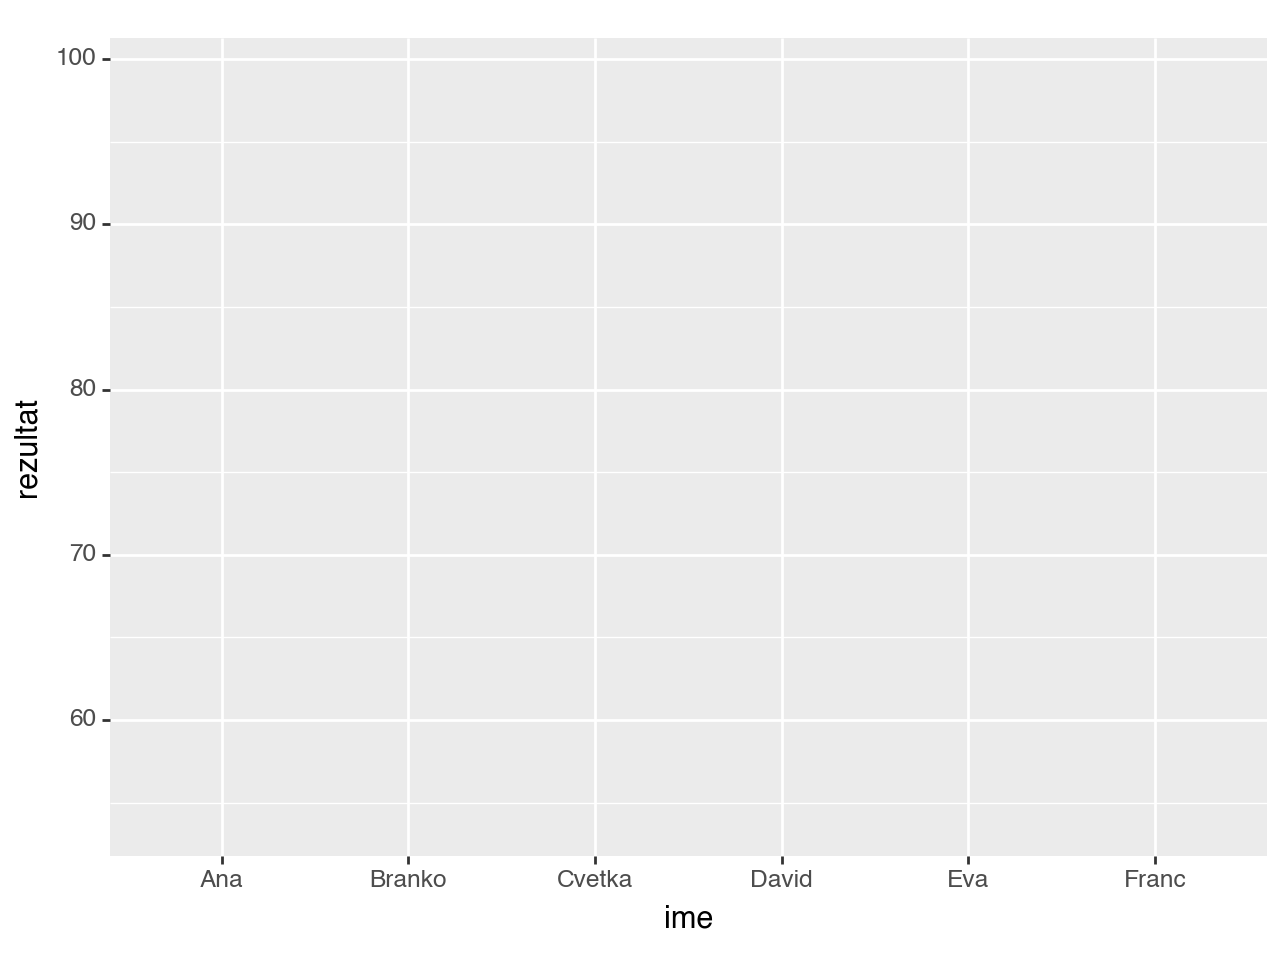

<Figure Size: (640 x 480)>

In [2]:
(
    p9.ggplot(data = studenti_ocene) +
    p9.aes(x = "ime", y = "rezultat")
)

Uporabili smo dve funkciji knjižnice `plotnine`. V klicu funkcije [`ggplot`](https://plotnine.readthedocs.io/en/stable/generated/plotnine.ggplot.html) smo določili prvi element slovnice, podatkovno tabelo `data`. S klicem funkcije [`aes`](https://plotnine.readthedocs.io/en/stable/generated/plotnine.mapping.aes.html) smo določili drugi element slovnice, estetski preslikavi za spremenljivki `ime` (pozicija `x`) in `rezultat` (pozicija `y`).

### Geometrijski objekt točka

A diagram je prazen. Zato, ker nismo določili tretje komponente slovnice, **geometrijski objekt** `geom`. To storimo s klicem tretje funkcije [`geom_point`](https://plotnine.readthedocs.io/en/stable/generated/plotnine.geoms.geom_point.html), ki določi, da je vsak rezultat študentov ponazorjen s točko:

/Users/ljupco/predmeti/pandas/venv/lib/python3.11/site-packages/plotnine/layer.py:364: PlotnineWarning: geom_point : Removed 4 rows containing missing values.


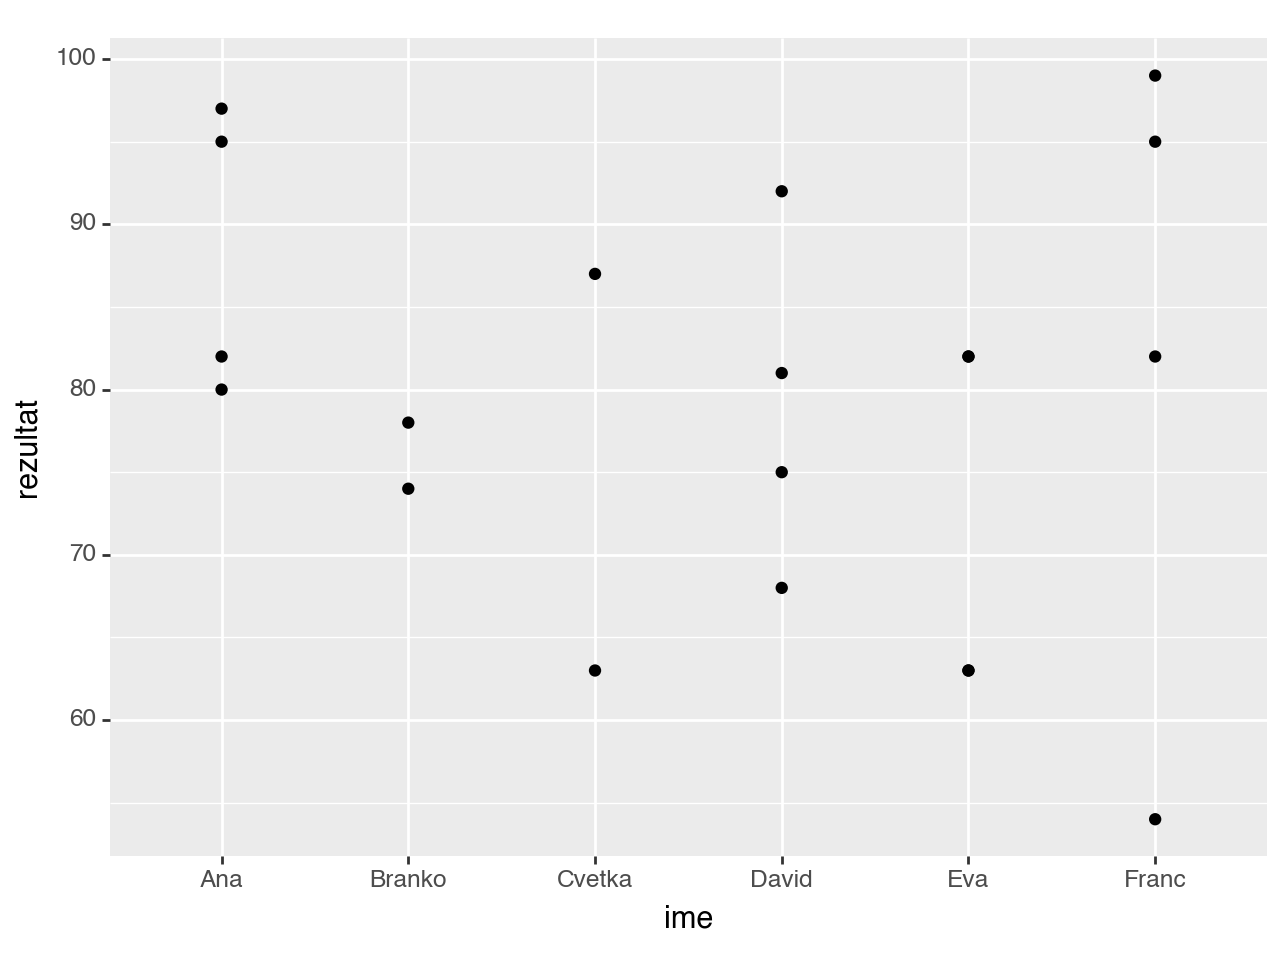

<Figure Size: (640 x 480)>

In [3]:
(
    p9.ggplot(data = studenti_ocene) +
    p9.aes(x = "ime", y = "rezultat") +
    p9.geom_point()
)

Pri izbiri geometrijskega objekta maramo upoštevati razpoložljiv nabor njegovih estetskih lastnosti. Estetske lastnosti točke lahko dobimo z vpogledom v dokumentacijo funkcije [`geom_point`](https://plotnine.readthedocs.io/en/stable/generated/plotnine.geoms.geom_point.html) (spomnimo se, lahko poiščemo pomoč za ustrezno funkcijo knjižnice `ggplot2`). Poglejmo celoten seznam estetskih lastnosti geometrijskega objekta točka:

- `x`, `y`, `shape`, `size`, `color` in `fill` smo že spoznali;

- `alpha` določa *stopnjo prozornosti* barve objekta (vrednost je med 0 in 1), nižje vrednosti povečujejo prozornost;

- `storke` določa debelino črte, ki ponazori rob objekta (točke).

Poglejmo dodatne primere uporabe estetskih lastnosti:

/Users/ljupco/predmeti/pandas/venv/lib/python3.11/site-packages/plotnine/layer.py:364: PlotnineWarning: geom_point : Removed 4 rows containing missing values.


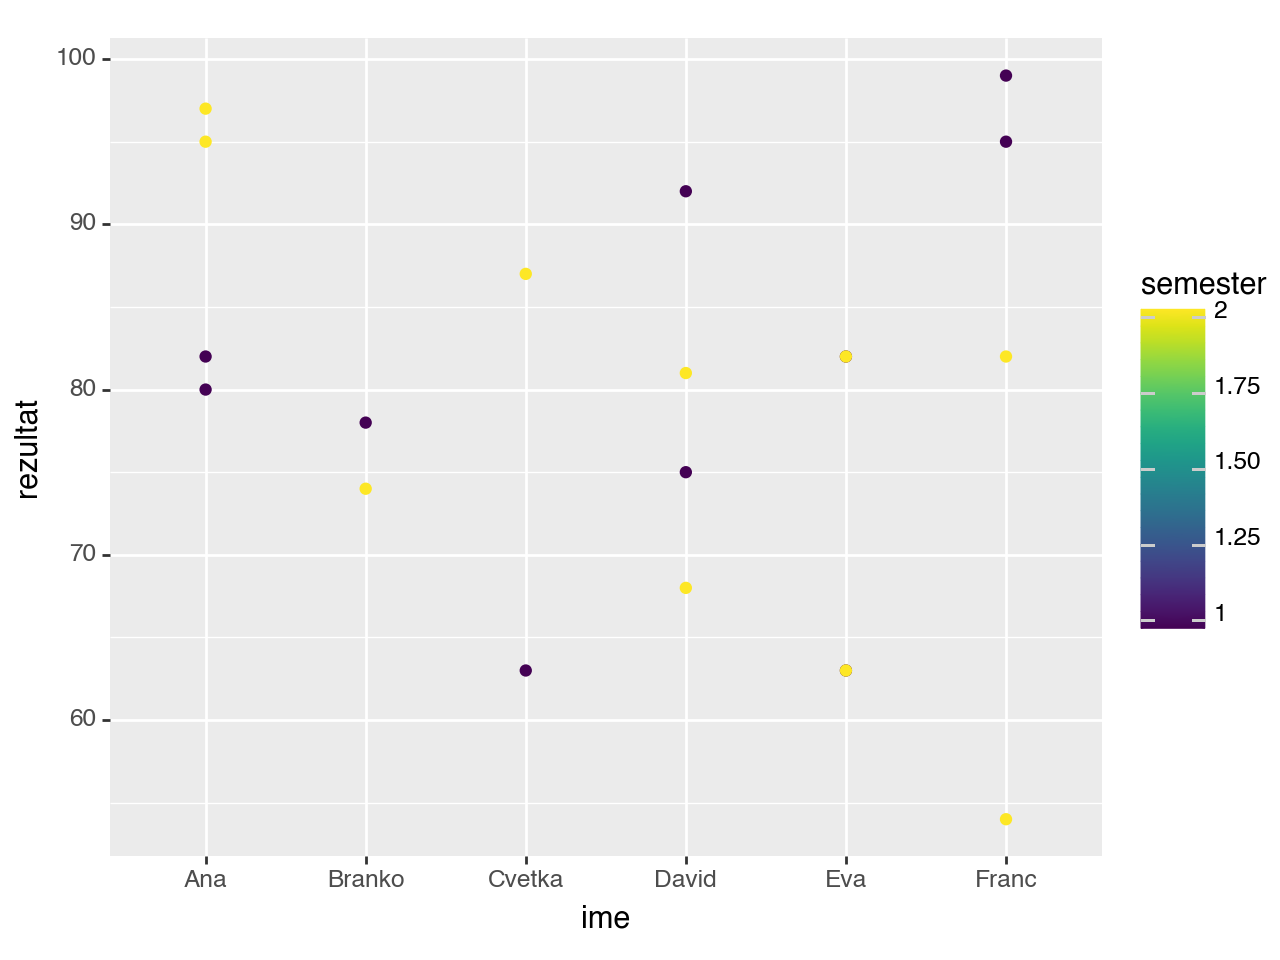

<Figure Size: (640 x 480)>

In [4]:
(
    p9.ggplot(data = studenti_ocene) +
    p9.aes(
        x = "ime",
        y = "rezultat",
        color = "semester"
    ) +
    p9.geom_point()
)

Poglejmo estetsko preslikavo za barvo, ki jo ponazori lestvica na desni strani diagrama. Vidimo, da je lestvica pripravljena za katerokoli vrednost spremenljivke `semester` na intervalu $[1,2]$. To je zato, ker je spremenljivka `semester` numeričnega tipa. Če tip te spremenljivke spremenimo v faktor, bi dobili boljši (in bolj ustrezen, pa tudi bolj pravilen) diagram:

/Users/ljupco/predmeti/pandas/venv/lib/python3.11/site-packages/plotnine/layer.py:364: PlotnineWarning: geom_point : Removed 4 rows containing missing values.


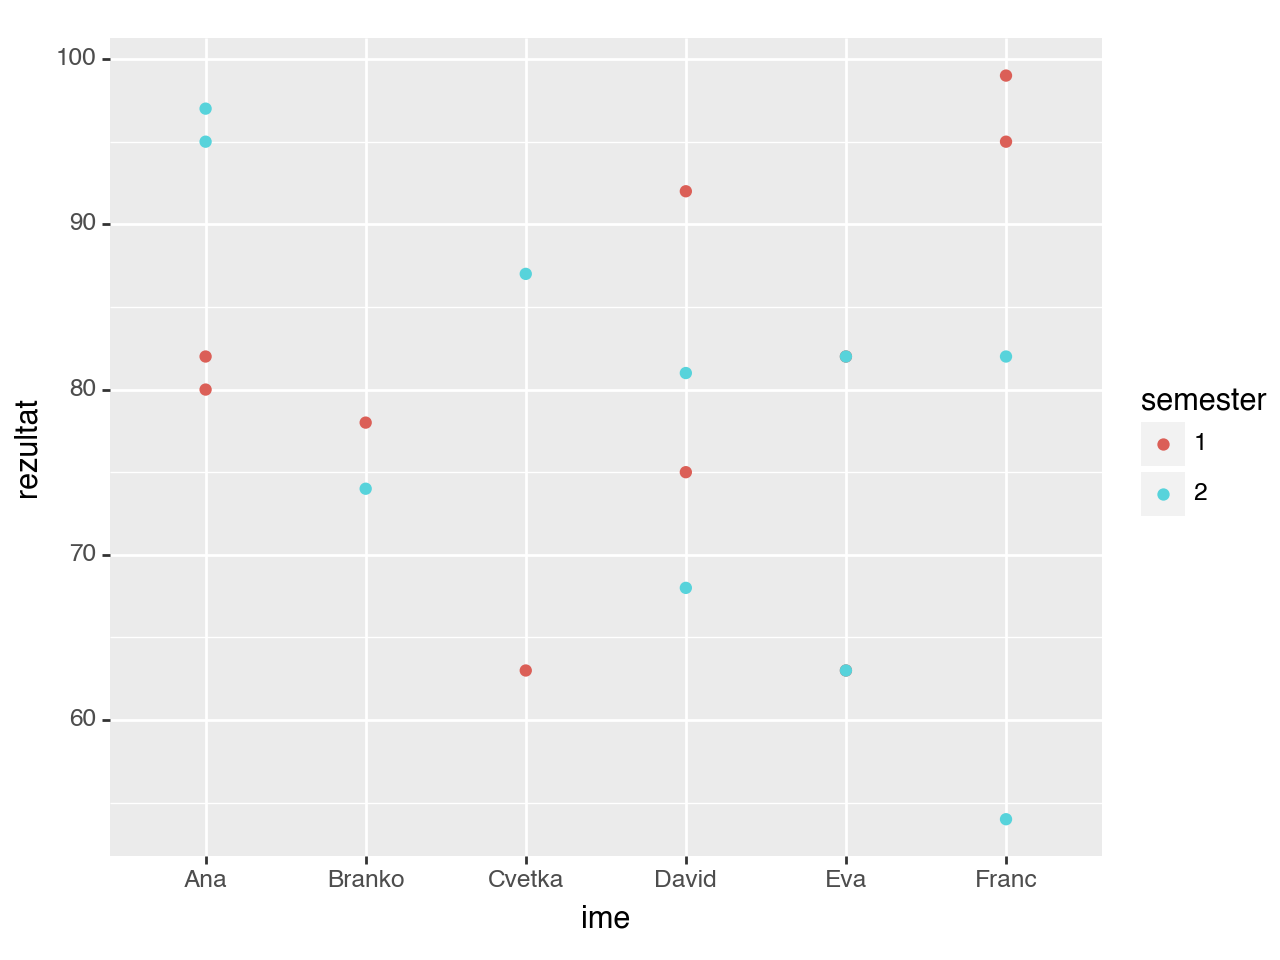

<Figure Size: (640 x 480)>

In [5]:
studenti_ocene.semester = studenti_ocene.semester.astype('category')
(
    p9.ggplot(data = studenti_ocene) +
    p9.aes(
        x = "ime",
        y = "rezultat",
        color = "semester"
    ) +
    p9.geom_point()
)

Estetska preslikava torej preslika diskretno spremenljivko $X$ v končno množico barv $D_\texttt{color}$ za katero velja $|D_\texttt{color}| = |D_X|$.

V estetsko lastnost oblike lahko preslikamo zgolj diskretne spremenljivke, zato bomo poskrbeli še za pretvorbo tipa spremenljivke `kolokvij`:

/Users/ljupco/predmeti/pandas/venv/lib/python3.11/site-packages/plotnine/layer.py:364: PlotnineWarning: geom_point : Removed 4 rows containing missing values.


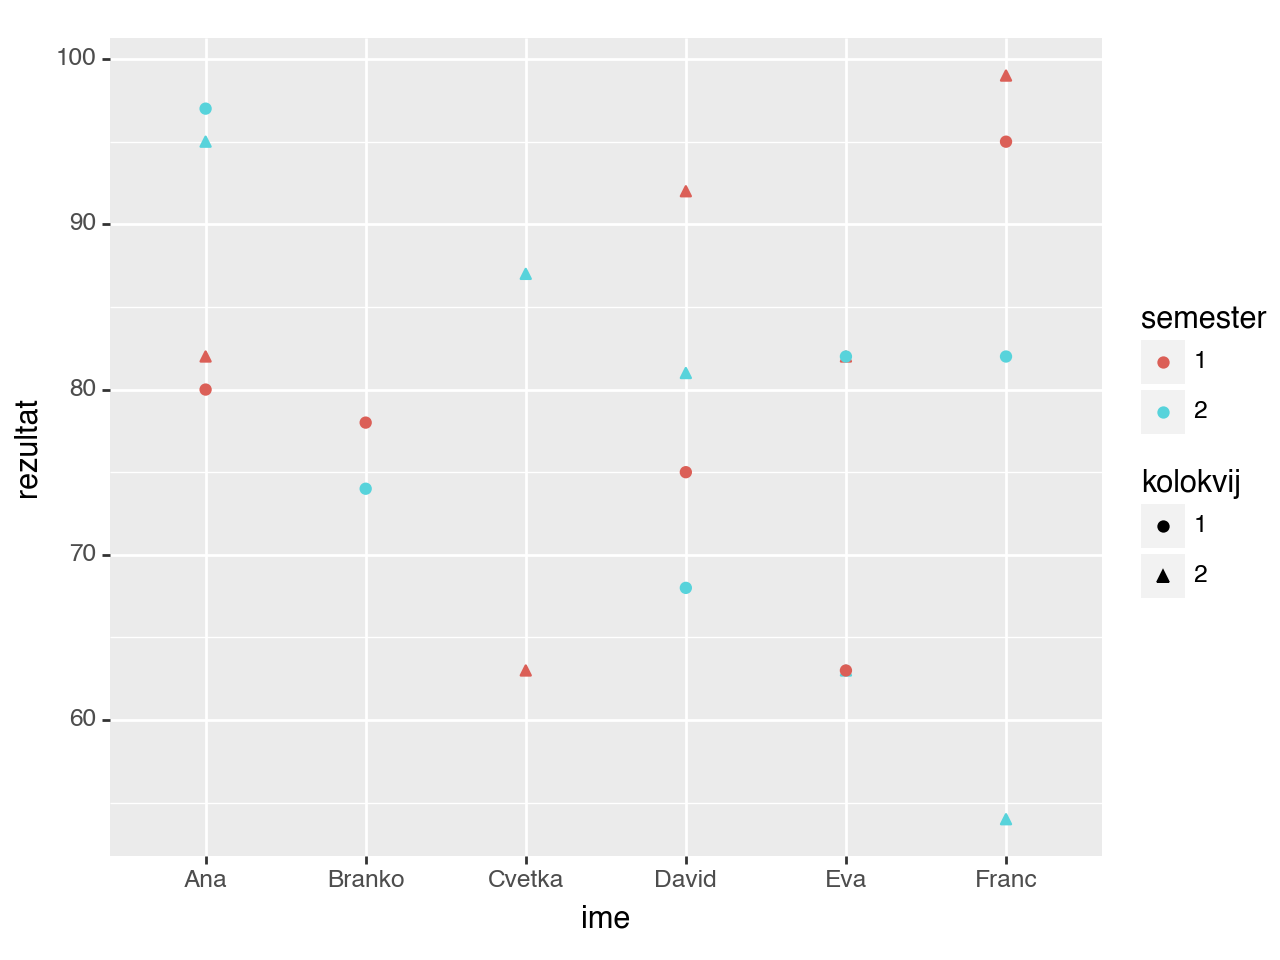

<Figure Size: (640 x 480)>

In [6]:
studenti_ocene.kolokvij = studenti_ocene.kolokvij.astype('category')
(
    p9.ggplot(data = studenti_ocene) + 
    p9.aes(
        x = "ime",
        y = "rezultat",
        color = "semester",
        shape = "kolokvij"
    ) +
    p9.geom_point()
)

Poskrbimo zdaj za velikost točk na diagramu: denimo, da želimo povečati vse točke na diagramu, ne glede na to, katere podatke ponazorijo. Torej zdaj ne gre za definiranje estetske preslikave (med podatki in estetsko lastnostjo), temveč rabimo zgolj _nastavljanje estetske lastnosti_ geometrijskih objektov. Slednje opravimo znotraj klica funkcije `geom_point` takole:

/Users/ljupco/predmeti/pandas/venv/lib/python3.11/site-packages/plotnine/layer.py:364: PlotnineWarning: geom_point : Removed 4 rows containing missing values.


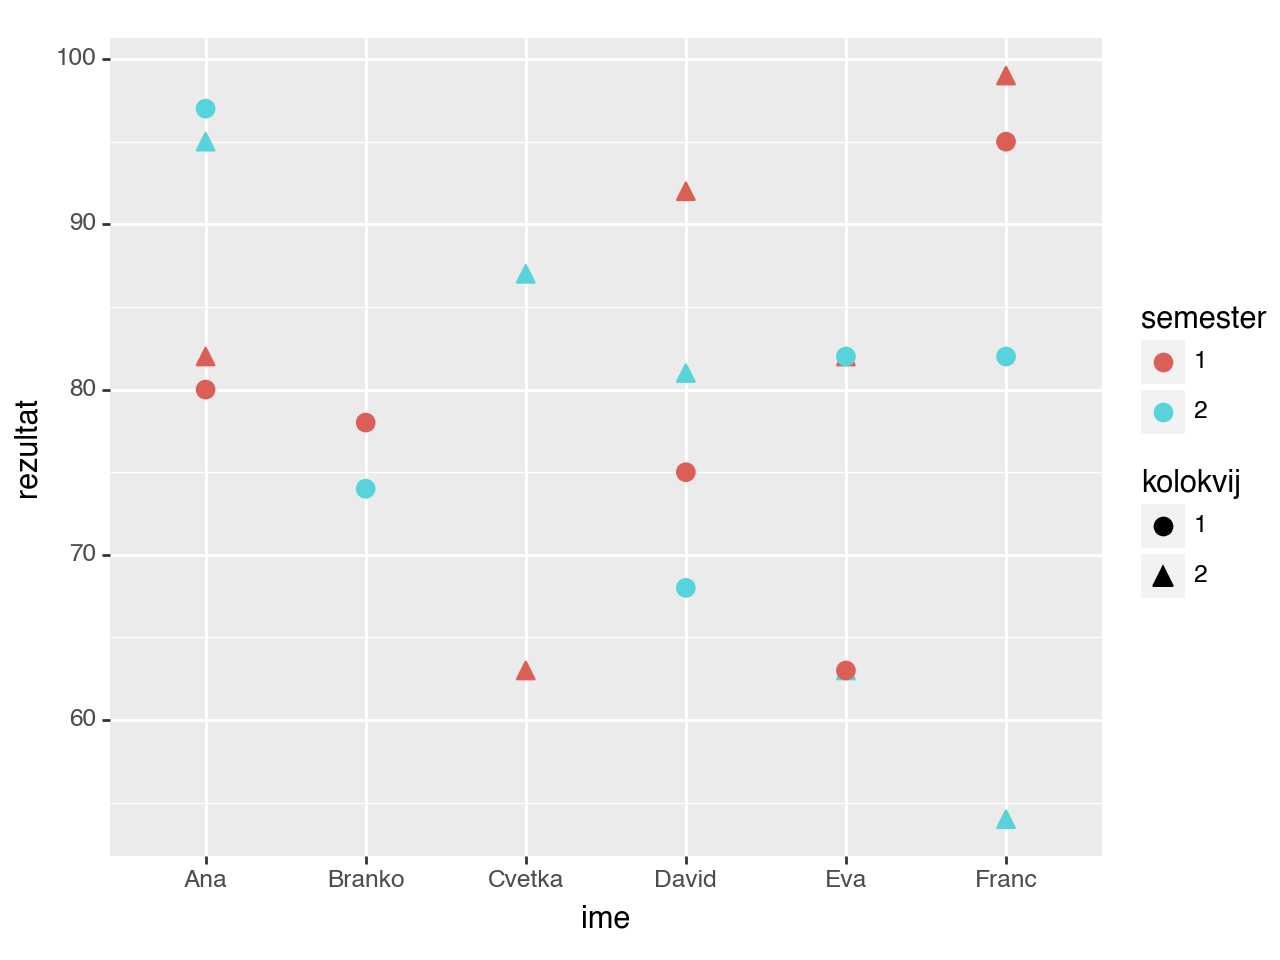

<Figure Size: (640 x 480)>

In [7]:
(
    p9.ggplot(data = studenti_ocene) + 
    p9.aes(
        x = "ime",
        y = "rezultat",
        color = "semester",
        shape = "kolokvij"
    ) +
    p9.geom_point(size = 3)
)

Za zaporedni številki semestra in kolokvija smo uporabili dve estetski lastnosti, kar se zdi potratno, glede na to, da gre za štiri zaporedne kolokvije. Namesto dveh oblik in dveh barv, bi lahko uporabili štiri barve. Zato, da to dosežemo, moramo izračunati novo spremenljivko, ki bo združevala semester in kolokvij. Na primer takole:

/Users/ljupco/predmeti/pandas/venv/lib/python3.11/site-packages/plotnine/layer.py:364: PlotnineWarning: geom_point : Removed 4 rows containing missing values.


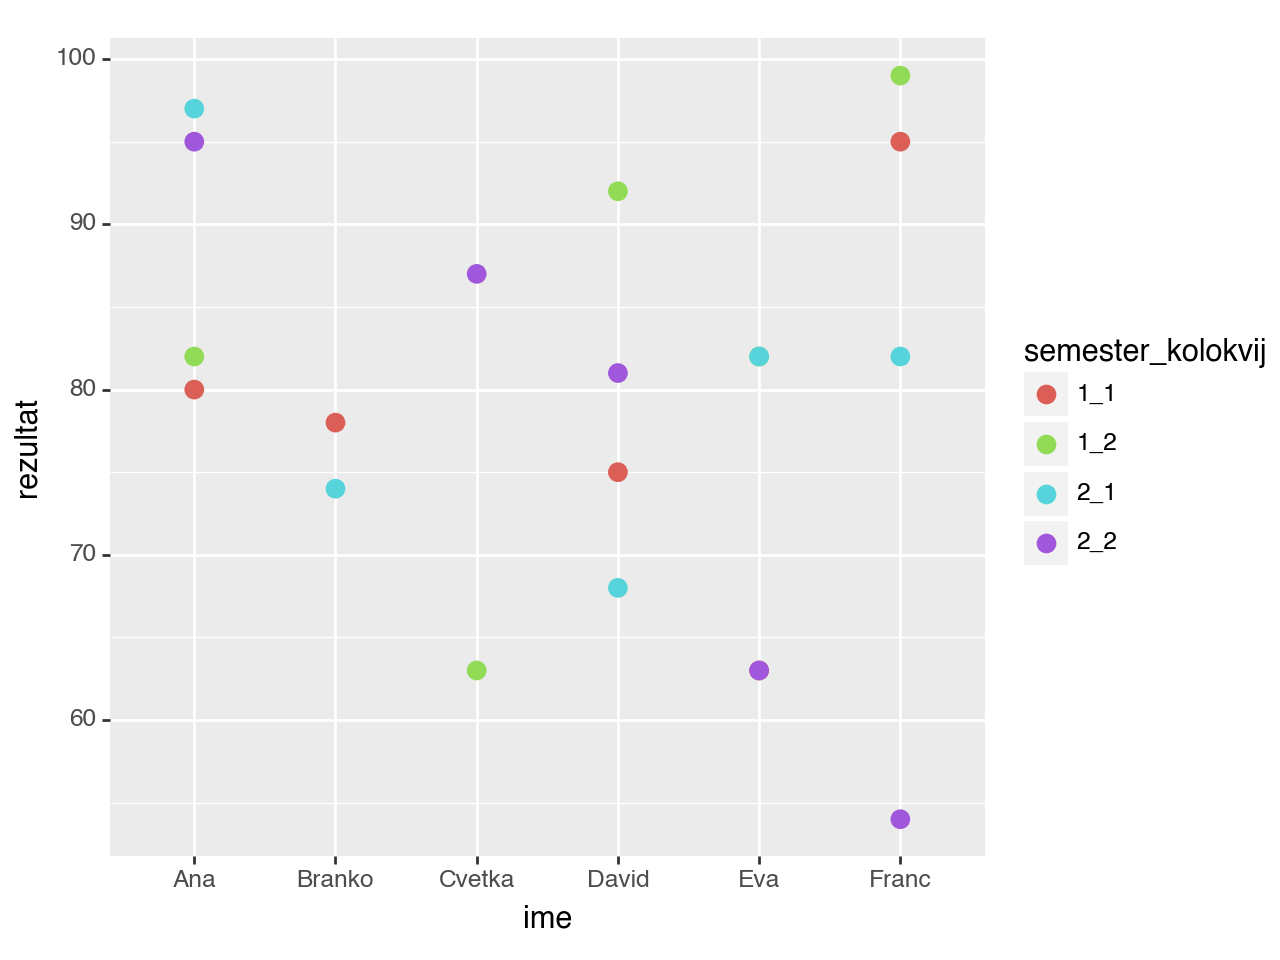

<Figure Size: (640 x 480)>

In [8]:
studenti_ocene["semester_kolokvij"] = pd.Series(
    studenti_ocene.semester.astype(str) + "_" + studenti_ocene.kolokvij.astype("str"),
    dtype = "category"
)
(
    p9.ggplot(data = studenti_ocene) + 
    p9.aes(
        x = "ime",
        y = "rezultat",
        color = "semester_kolokvij"
    ) +
    p9.geom_point(size = 3)
)

### Geometrijski objekt stolpec

Z uporabo funkcije [`geom_col`](https://plotnine.readthedocs.io/en/stable/generated/plotnine.geoms.geom_col.html) zamenjati geometrijski objekt iz točke v pravokotnik, ki ga v `plotnine` imenujemo stolpec, po angleško `col` od _column_:

/Users/ljupco/predmeti/pandas/venv/lib/python3.11/site-packages/plotnine/layer.py:344: PlotnineWarning: position_stack : Removed 4 rows containing missing values.


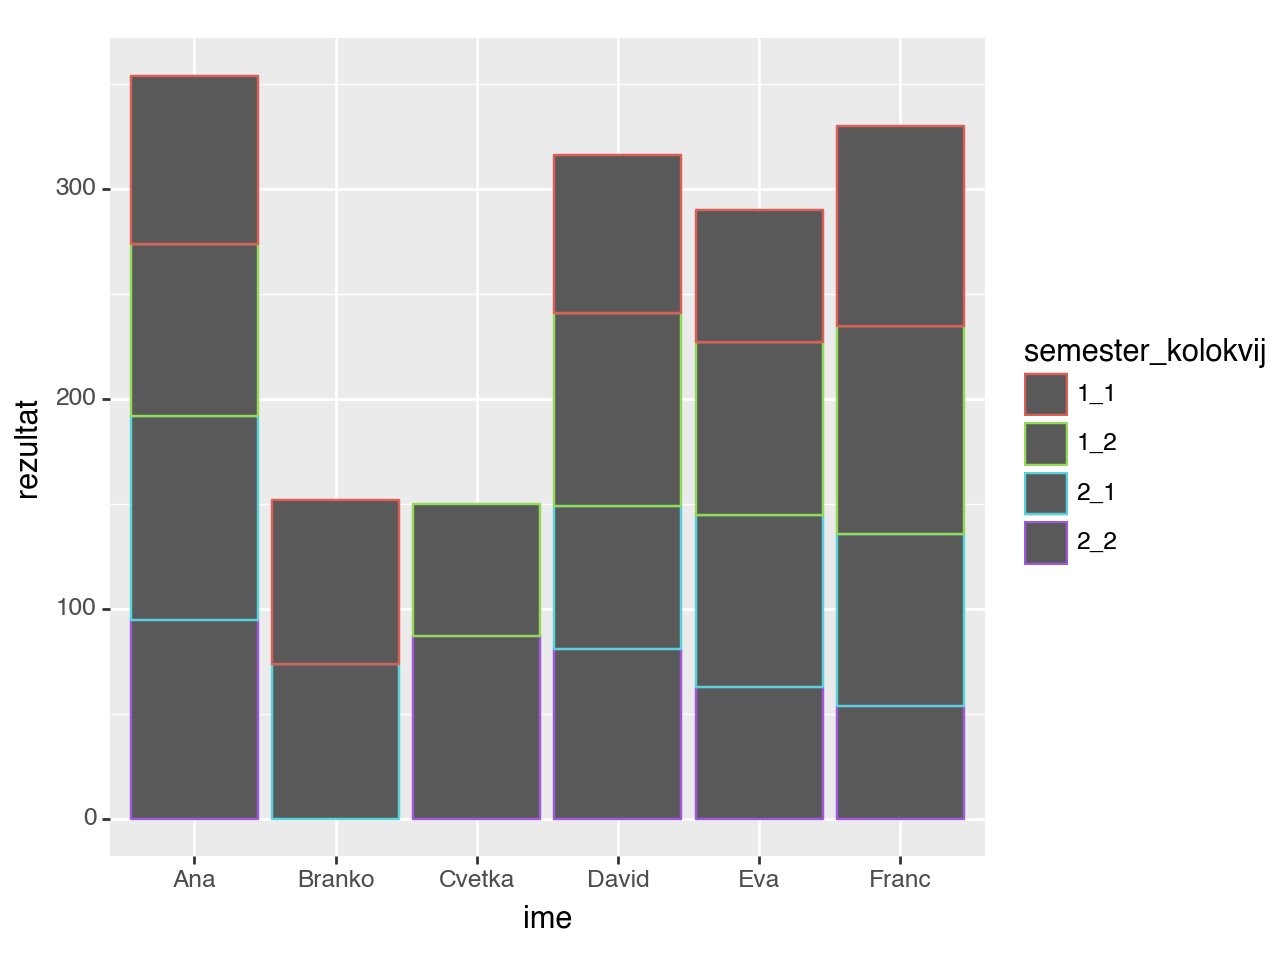

<Figure Size: (640 x 480)>

In [9]:
(
    p9.ggplot(data = studenti_ocene) +
    p9.aes(
        x = "ime",
        y = "rezultat",
        color = "semester_kolokvij"
    ) +
    p9.geom_col()
)

Spomnimo se, da `color` določa le barvo **roba** geometrijskega objekta. Če hočemo spreminjati tudi barvo **notranjosti** objekta, uporabiti moramo estetsko lastnost `fill`:

/Users/ljupco/predmeti/pandas/venv/lib/python3.11/site-packages/plotnine/layer.py:344: PlotnineWarning: position_stack : Removed 4 rows containing missing values.


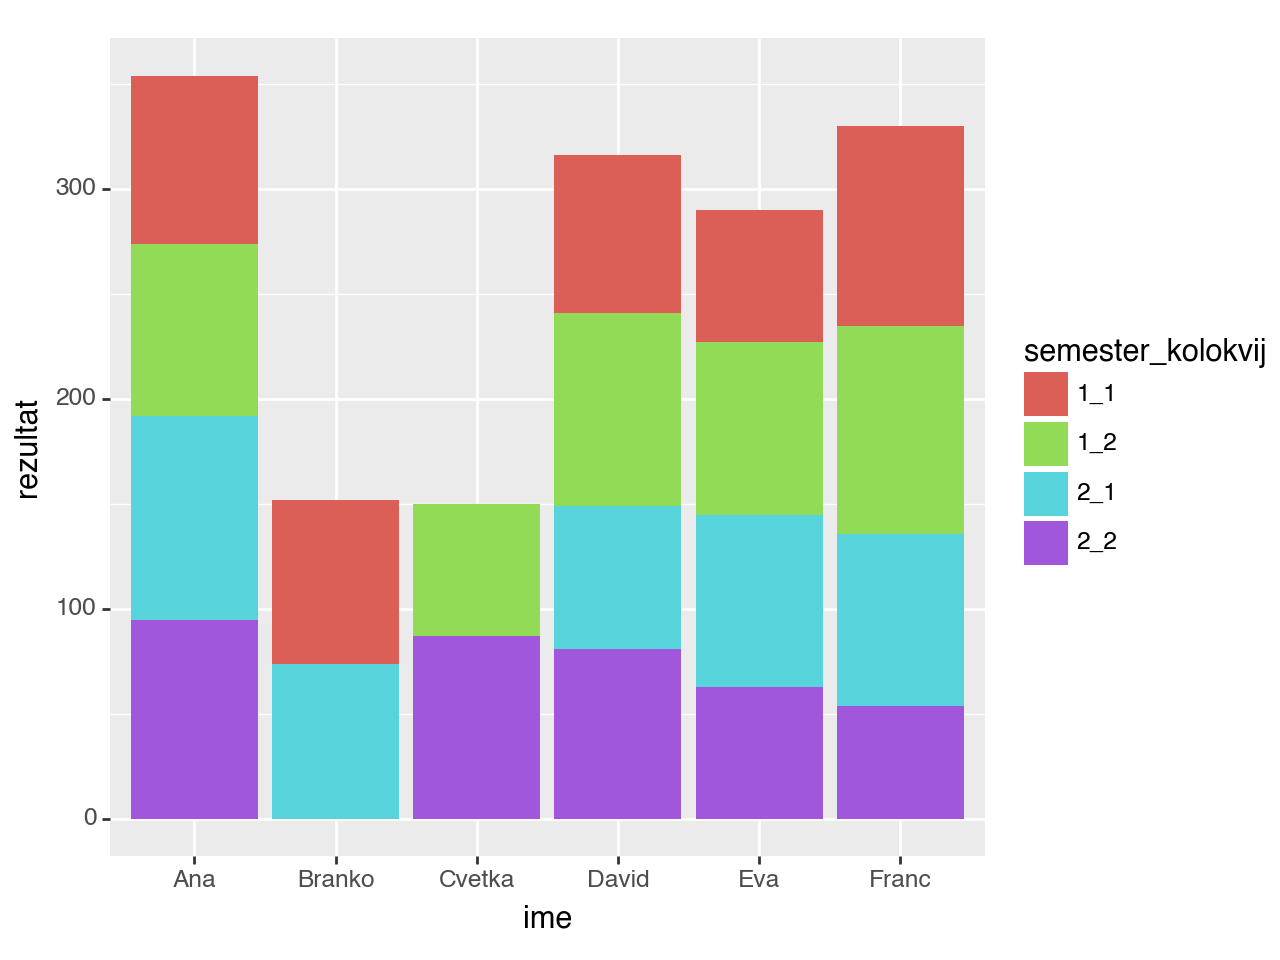

<Figure Size: (640 x 480)>

In [10]:
(
    p9.ggplot(data = studenti_ocene) + 
    p9.aes(
        x = "ime",
        y = "rezultat",
        fill = "semester_kolokvij"
    ) +
    p9.geom_col()
)

Na diagramu lahko opazimo nenavadno razporeditev kolokvijev: prvi kolokvij v prvem semestru je na vrhu stolpcev, zadnji kolokvij (drugi v drugem semestru) je pa na dnu. Ta razporeditev ni naravne, za vrednosti v stolpcih diagrama pričakujemo, da so razporejene v vrstnem redu od spodaj navzgor. Pričakovali bi, torej, da so rezultati prvega kolokvija v prvem semestru na dnu stolpcev. Razpored kolokvijev je posledica vrstnega reda kategorij spremenljivke `semester_kolokvij`:

In [11]:
kategorije = studenti_ocene.semester_kolokvij.cat.categories.to_list()
print(kategorije)

['1_1', '1_2', '2_1', '2_2']


/Users/ljupco/predmeti/pandas/venv/lib/python3.11/site-packages/plotnine/layer.py:344: PlotnineWarning: position_stack : Removed 4 rows containing missing values.


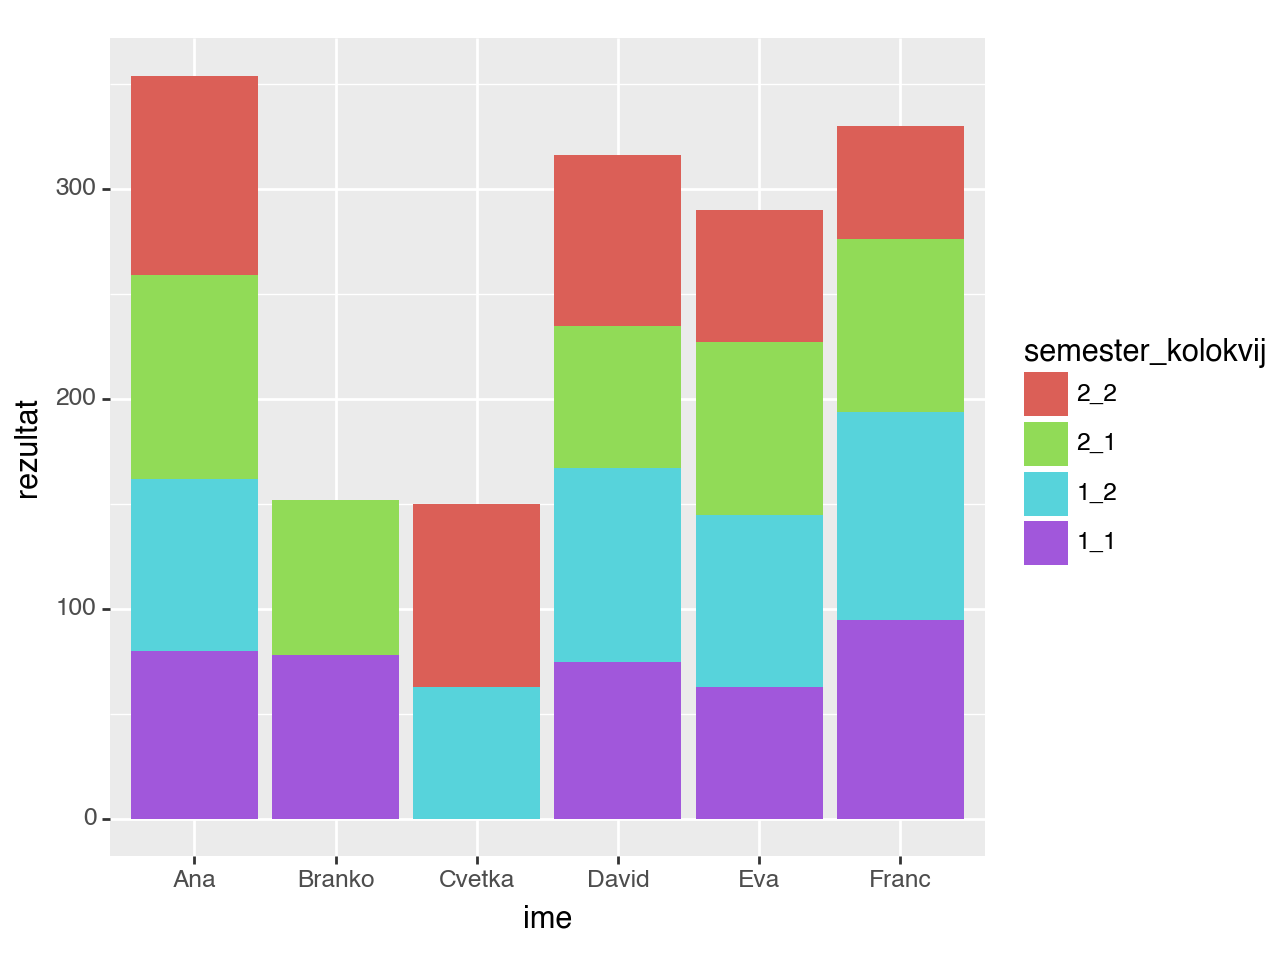

<Figure Size: (640 x 480)>

In [12]:
kategorije.reverse()
studenti_ocene.semester_kolokvij = studenti_ocene.semester_kolokvij.cat.reorder_categories(
    new_categories = kategorije
)
(
    p9.ggplot(data = studenti_ocene) + 
    p9.aes(
        x = "ime",
        y = "rezultat",
        fill = "semester_kolokvij"
    ) +
    p9.geom_col()
)

### Geometrijski objekt črta

Poskusimo še en osnovni geometrijski objekt, črto s funkcijo [`geom_line`](https://plotnine.readthedocs.io/en/stable/generated/plotnine.geoms.geom_line.html):

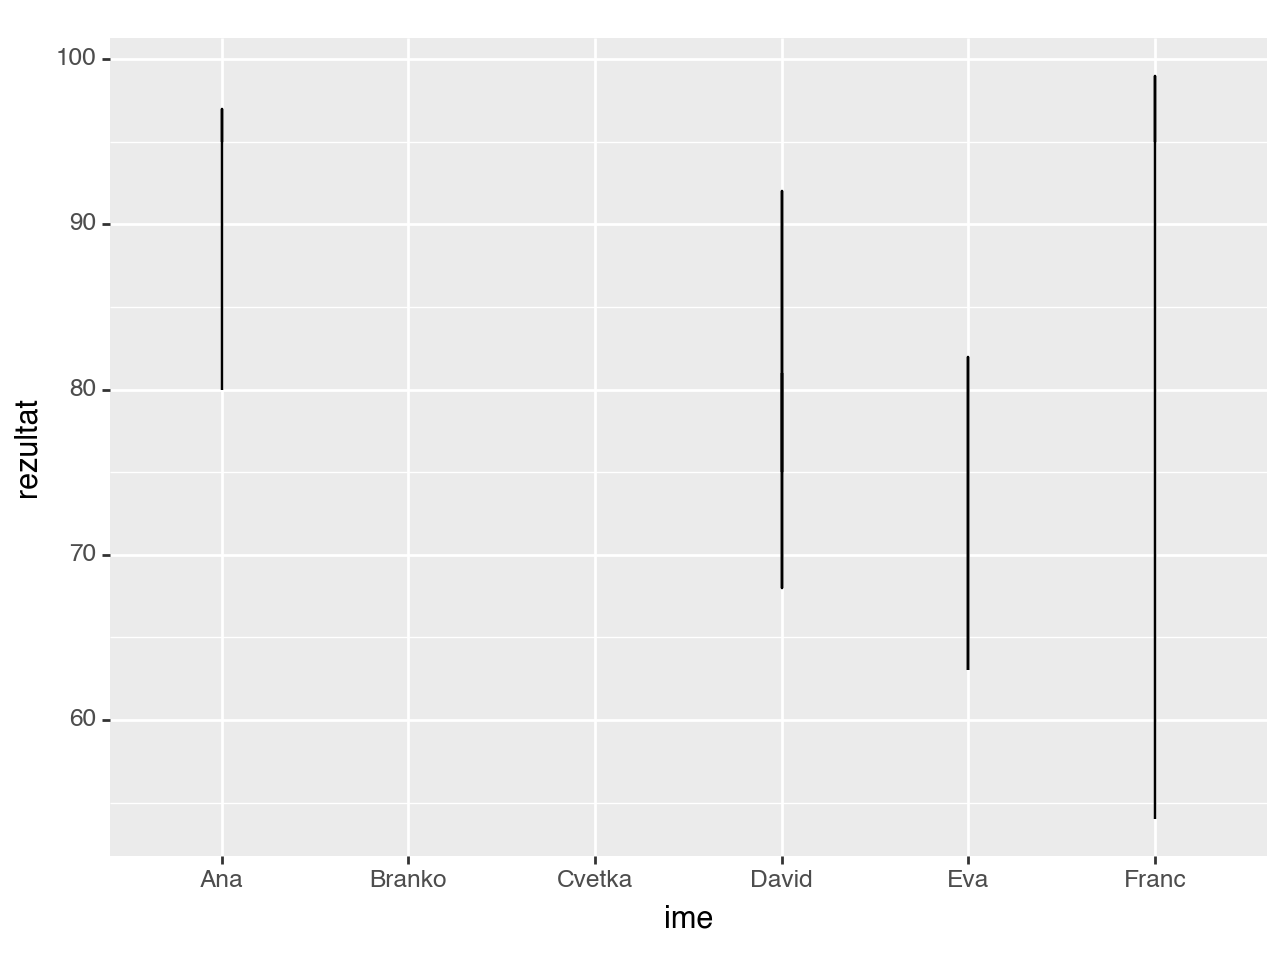

<Figure Size: (640 x 480)>

In [13]:
(
    p9.ggplot(data = studenti_ocene) +
    p9.aes(x = "ime", y = "rezultat") +
    p9.geom_line()
)

Nepričakovan rezultat: črte so namreč vertikalne in povezujejo vrednosti rezultatov za vsakega študenta posebej. Prej bi pričakovali, da bi črte povezovale dosežke različnih študentov pri istem kolokviju. Zato imamo na voljo še eno estetsko lastnost `group`, ki določa skupine podatkov. Če želimo, da se črte nanašajo na posamezne kolokvije, bomo uporabili:

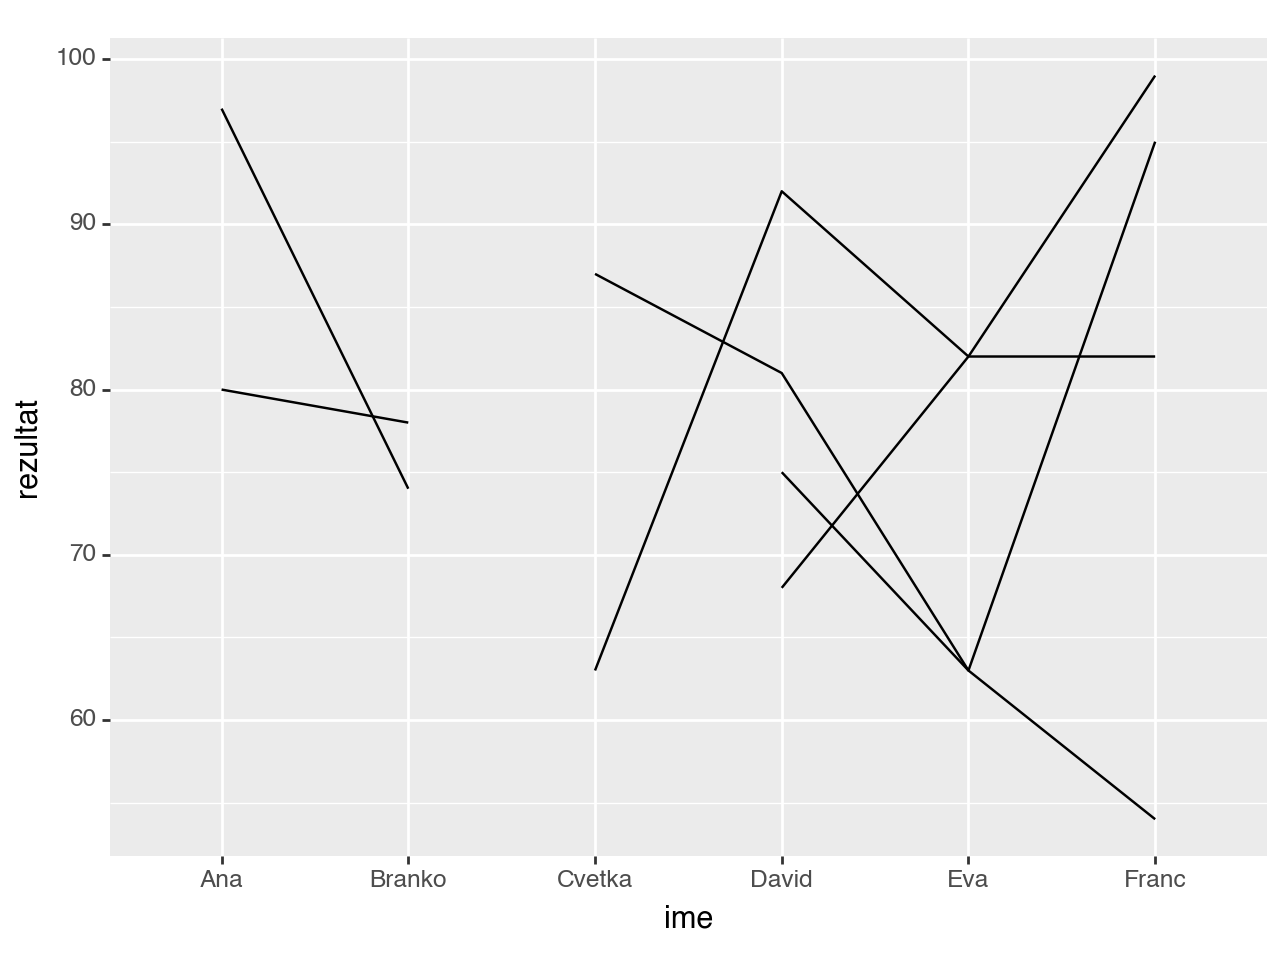

<Figure Size: (640 x 480)>

In [14]:
(
    p9.ggplot(data = studenti_ocene) + 
    p9.aes(
        x = "ime",
        y = "rezultat",
        group = "semester_kolokvij"
    ) +
    p9.geom_line()
)

Zato, da izboljšamo berljivost diagrama (na zgornjem diagramu ne moremo razlikovati kolokvijev, saj so vse črte enake barve), lahko skupine pobarvamo z različnimi barvami, črte odebelimo in črtam dodamo še točke:

/Users/ljupco/predmeti/pandas/venv/lib/python3.11/site-packages/plotnine/layer.py:364: PlotnineWarning: geom_point : Removed 4 rows containing missing values.


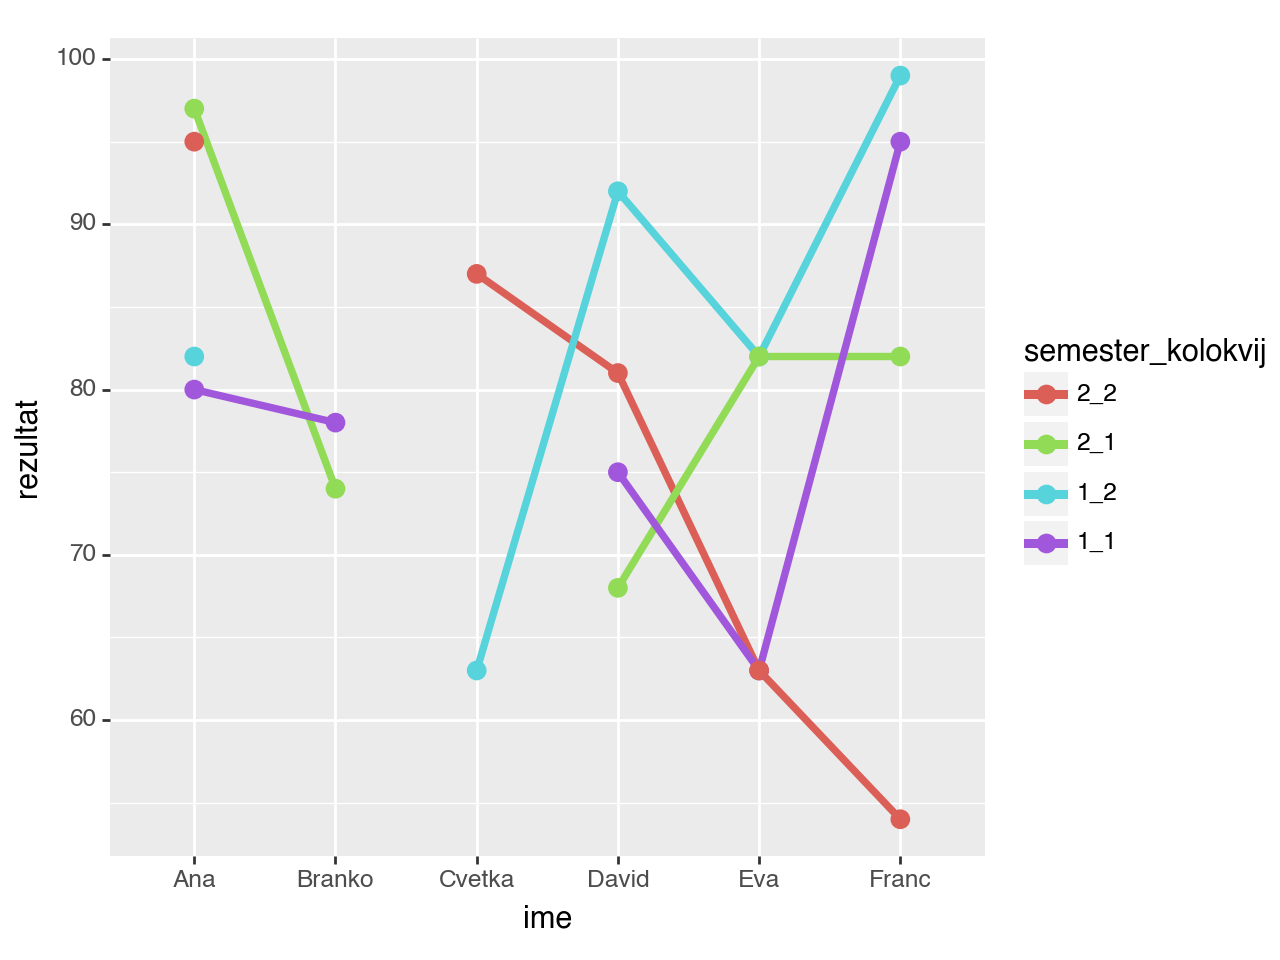

<Figure Size: (640 x 480)>

In [15]:
(
    p9.ggplot(data = studenti_ocene) + 
    p9.aes(
        x = "ime",
        y = "rezultat",
        group = "semester_kolokvij",
        color = "semester_kolokvij"
    ) +
    p9.geom_line(size = 1.5) +
    p9.geom_point(size = 3)
)

Če zaradi tiskanja dokumenta želimo črno-belo različico zgornjega diagrama, lahko barve črt in točk nadomestimo z oblikami `linetype` in `shape`:

/Users/ljupco/predmeti/pandas/venv/lib/python3.11/site-packages/plotnine/layer.py:364: PlotnineWarning: geom_point : Removed 4 rows containing missing values.


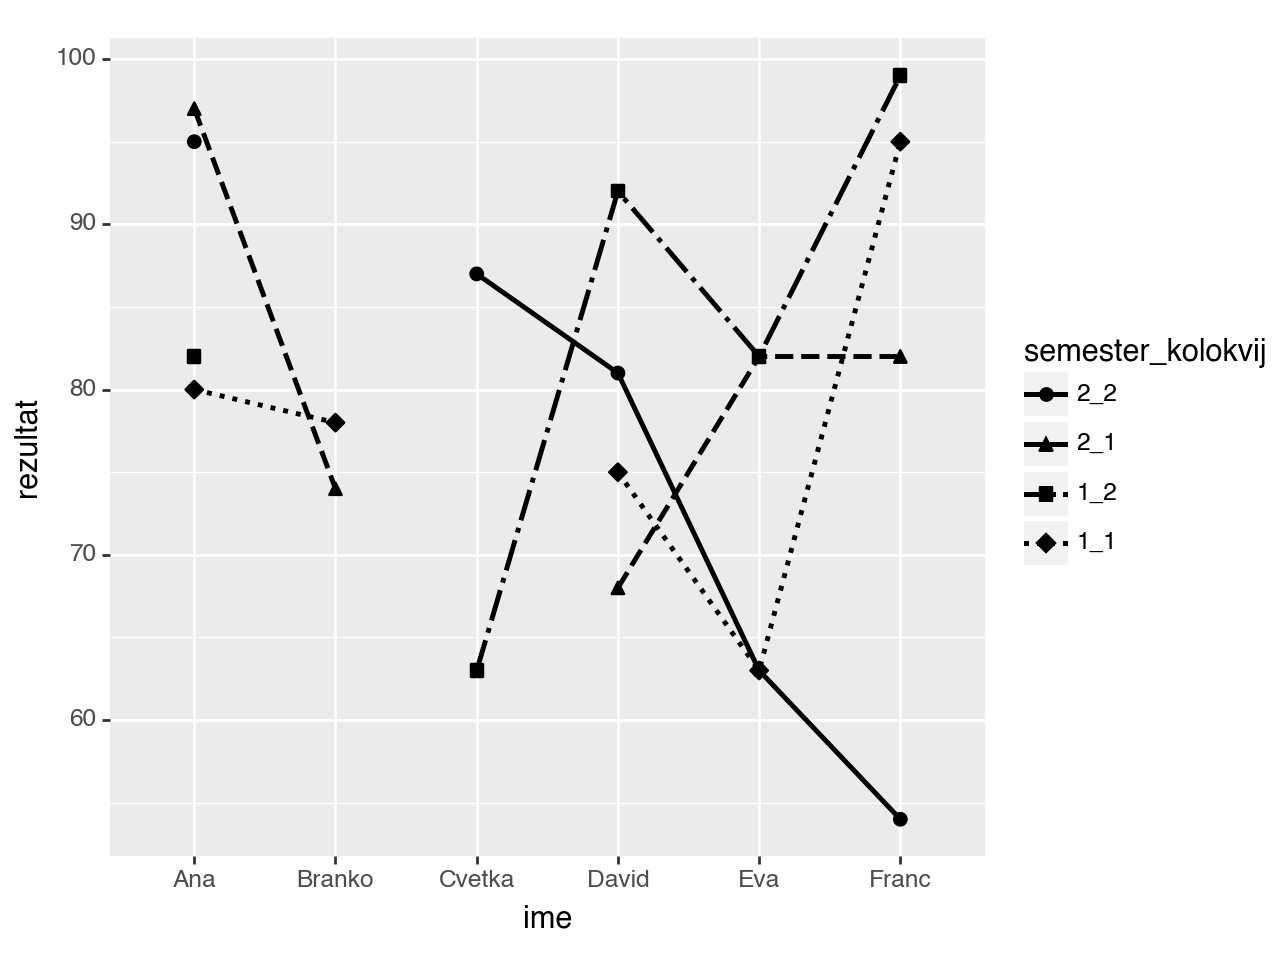

<Figure Size: (640 x 480)>

In [16]:
(
    p9.ggplot(data = studenti_ocene) + 
    p9.aes(
        x = "ime",
        y = "rezultat",
        group = "semester_kolokvij",
        linetype = "semester_kolokvij",
        shape = "semester_kolokvij"
    ) +
    p9.geom_line(size = 1) +
    p9.geom_point(size = 2)
)

### Geometrijski objekt škatla

Poskusimo nazadnje še geometrijski objekt škatla, `boxplot` z uporabo funkcije [`geom_boxplot`](https://plotnine.readthedocs.io/en/stable/generated/plotnine.geoms.geom_boxplot.html):

/Users/ljupco/predmeti/pandas/venv/lib/python3.11/site-packages/plotnine/layer.py:284: PlotnineWarning: stat_boxplot : Removed 4 rows containing non-finite values.


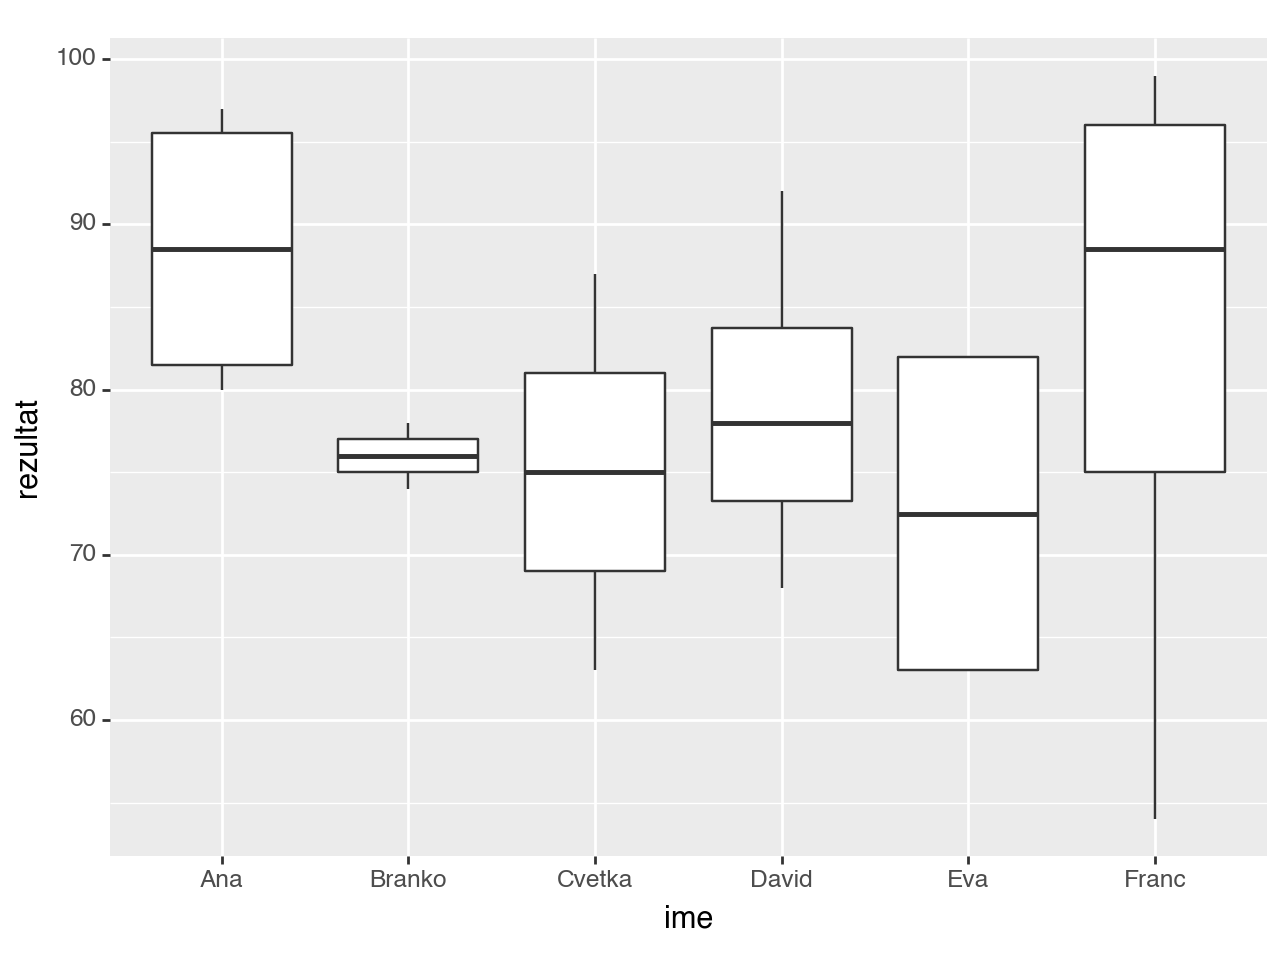

<Figure Size: (640 x 480)>

In [17]:
(
    p9.ggplot(data = studenti_ocene) +
    p9.aes(
        x = "ime",
        y = "rezultat"
    ) +
    p9.geom_boxplot()
)

Ta diagram nam prikaže porazdelitve rezultatov štirih kolokvijev za vsako študentko (vsakega študenta) posebej. Takemu diagramu rečemo tudi škatla z brki. Zadebeljena črta v sredini škatle ustreza mediani (srednji vrednosti) spremenljivke. Višina škatle ustreza medkvartilnim razmikom: zgornji rob škatle ustreza tretjemu, spodnji rob pa prvemu kvartilu opazovanih vrednosti spremenljivke. Brki (črte) se raztezajo pod in nad škatlo vse do minimalne oziroma maksimalne opazovane vrednosti.

## Plasti (angl. *layers*) statističnega diagrama

Četrti element slovnice statističnih diagramov je **plast**. Slednji nam omogočajo dvoje: kombiniranje več tipov geometrijskih objektov in/ ali kombiniranje podatkov iz različnih podatkovnih tabel. V takih primerih se vsaka plast prinese v diagram en tip geometrijskih objektov in eno podatkovno tabelo.

Večina diagramov predstavljenih v prejšnjem razdelku je **enoplastnih**. Enoplastni diagram vsebuje (1) geometrijske objekte enega tipa in (2) podatke iz ene podatkovne tabele. Izjema sta dva diagrama, ki kombinirata po dva tipa geometrijskih objektov. Poglejmo enega od njih, kjer ena plast vizualizira podatke s točkami, druga pa s črtami:

/Users/ljupco/predmeti/pandas/venv/lib/python3.11/site-packages/plotnine/layer.py:364: PlotnineWarning: geom_point : Removed 4 rows containing missing values.


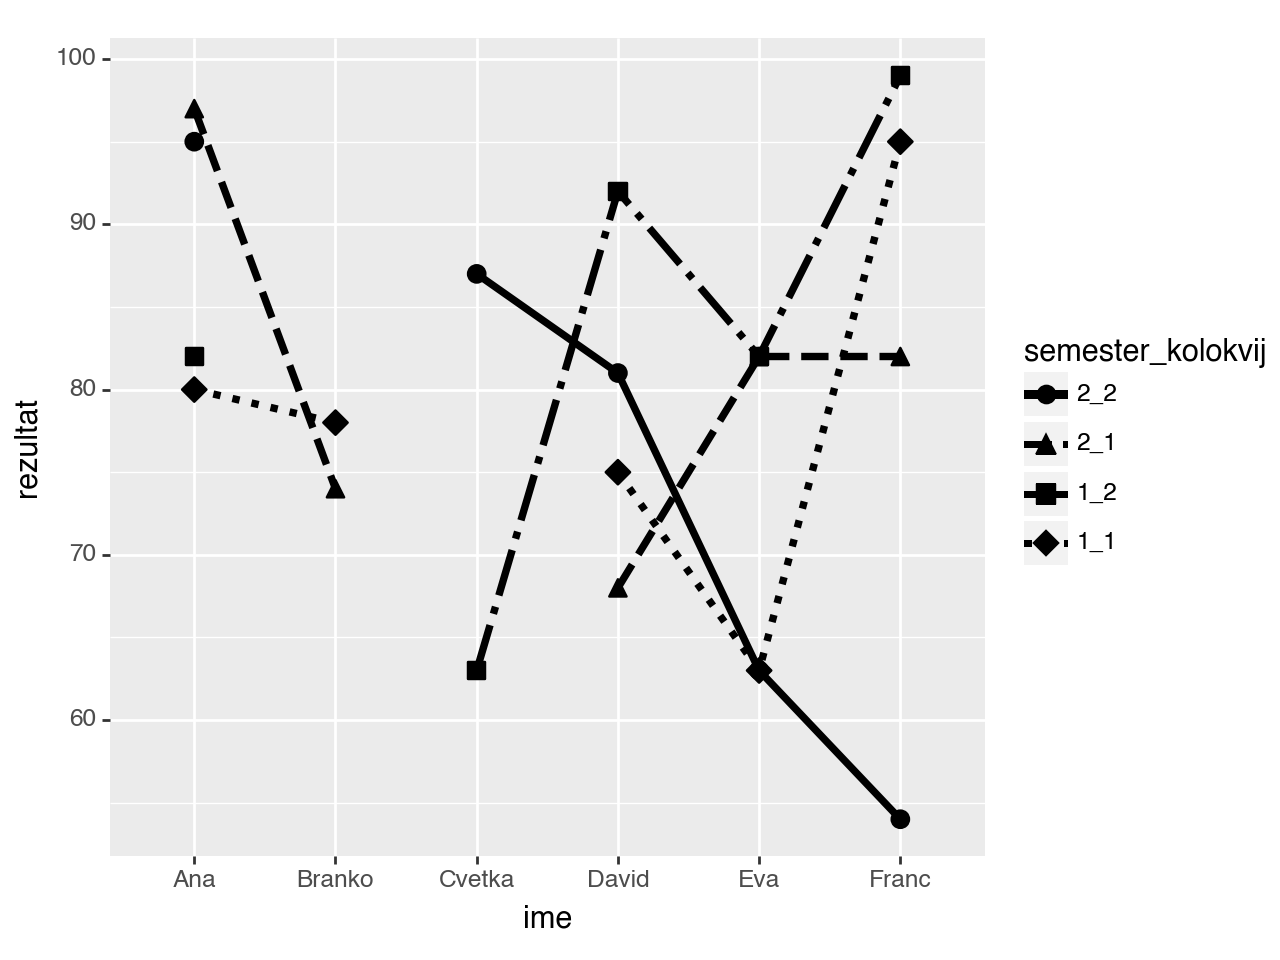

<Figure Size: (640 x 480)>

In [18]:
(
    p9.ggplot(studenti_ocene) +
    p9.aes(
        x = "ime",
        y = "rezultat",
        group = "semester_kolokvij",
        linetype = "semester_kolokvij",
        shape = "semester_kolokvij"
    ) +
    p9.geom_line(size = 1.5) +
    p9.geom_point(size = 3)
)

Obe plasti diagrama si delita tako podatkovno tabelo kot vse estetske preslikave. Slednje so v zgornjem diagramu definirane s klicem funkcije `aes`, ki je skupen vsem plastem.

Plasti nam omogočajo bolj fleksibilno geometrijskih objektov z različnimi estetskimi preslikavami. Preslikave, ki so skupne vsem geometrijskim objektom, imenujemo _globalne estetske preslikave_ in jih definiramo tako kot v zgornjih primerih, s klicem funkcije `aes`, ki je skupen vsem plastem. Vsakemu tipu geometrijskih objektov lahko definiramo _lokalne estetske preslikave_, ki se nanašajo zgolj na plast z objekti tega tipa. Lokalne preslikave definiramo s klicem funkcije `aes` pri nastavitvi vrednosti argumenta `mapping` funkcije s predpono `geom_`:

/Users/ljupco/predmeti/pandas/venv/lib/python3.11/site-packages/plotnine/layer.py:364: PlotnineWarning: geom_point : Removed 4 rows containing missing values.


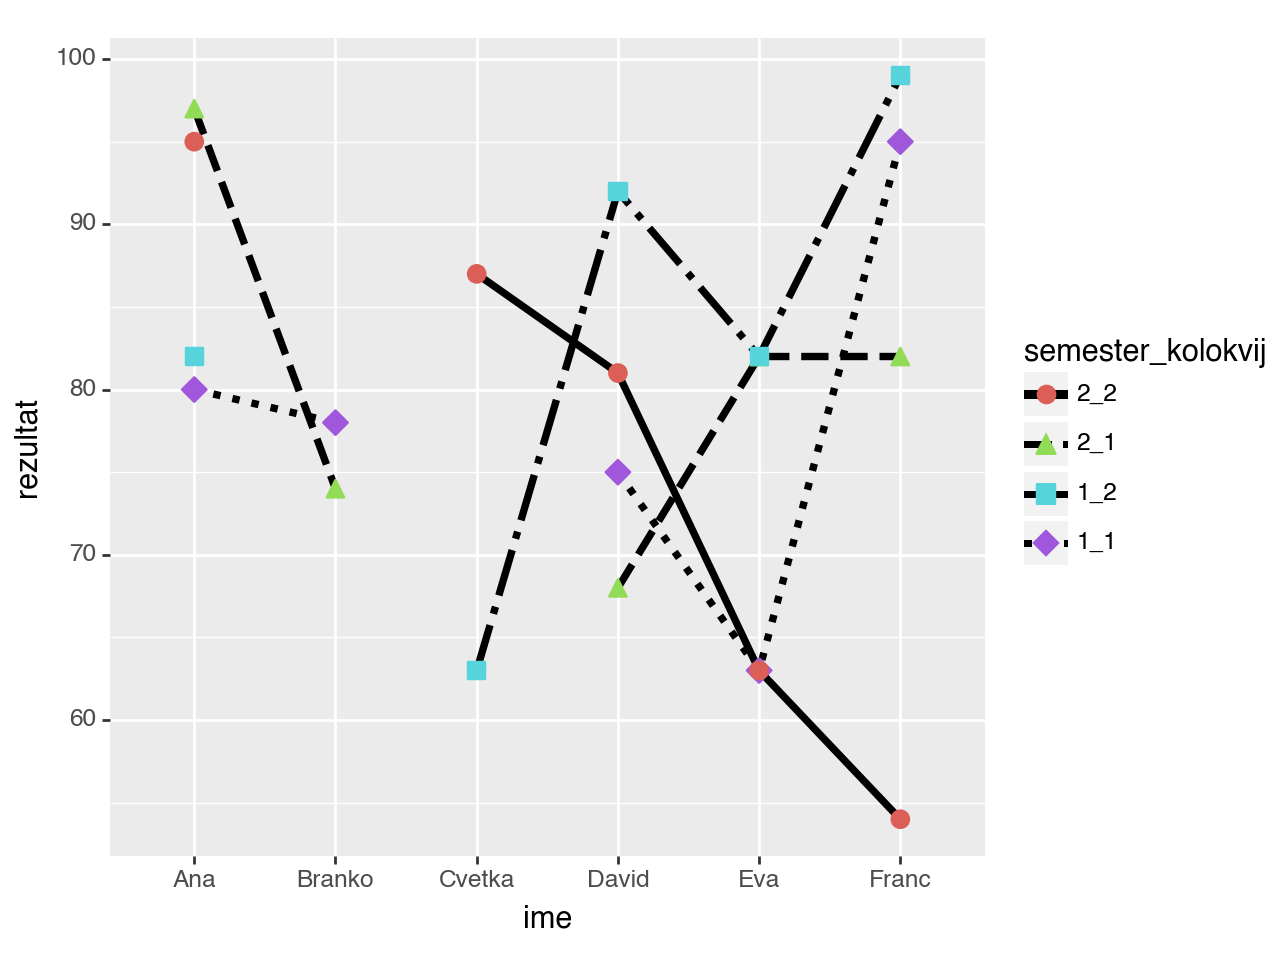

<Figure Size: (640 x 480)>

In [19]:
(
    p9.ggplot(studenti_ocene) +
    p9.aes(
        x = "ime",
        y = "rezultat",
        group = "semester_kolokvij",
        linetype = "semester_kolokvij",
        shape = "semester_kolokvij",
    ) +
    p9.geom_line(size = 1.5) +
    p9.geom_point(
        mapping = p9.aes(color = "semester_kolokvij"),
        size = 3
    )
)

Za vajo ugotovi, kaj se zgodi, če preslikavo za estetsko lastnost `color` v zgornjem primeru prestavimo med globalne estetske preslikave (to smo pravzaprav že naredili v prejšnjem razdelku).

Denimo, da bi hoteli diagram enak prejšnjemu, kjer bi na črti za posamezen kolokvij pobarvali zgolj eno točko, ki ustreza najboljšemu rezultatu na tem kolokviju. Pri tem bi za študentke uporabili eno, za študente pa drugo barvo. Izračunajmo najprej tabelo z najboljšimi rezultati na posameznem kolokviju. Nato tej tabeli dodajmo še ime in spol študentke (študenta), ki je ta rezultat dosegla:

In [20]:
naj_ocene = studenti_ocene.groupby("semester_kolokvij").agg(naj_rezultat = ("rezultat", "max"))
naj_ocene = naj_ocene.merge(studenti_ocene,
    left_on = ["semester_kolokvij", "naj_rezultat"],
    right_on = ["semester_kolokvij", "rezultat"],
    how = "left"
)
naj_ocene = naj_ocene.loc[:, ["semester_kolokvij", "naj_rezultat", "ime"]]
naj_ocene = naj_ocene.merge(studenti, on = "ime", how = "left")
naj_ocene = naj_ocene.loc[:, ["semester_kolokvij", "naj_rezultat", "ime", "spol"]]

naj_ocene

/var/folders/g7/xgt9ckmj6g1404knwg8j5rkc0000gn/T/ipykernel_3204/3229582693.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.


,semester_kolokvij,naj_rezultat,ime,spol
0,2_2,95.0,Ana,ž
1,2_1,97.0,Ana,ž
2,1_2,99.0,Franc,m
3,1_1,95.0,Franc,m


Zdaj bomo prvemu diagramu iz tega razdelka dodali nov plast, ki uporablja podatke iz tabele `naj_ocene`. Tako kot smo prej za plast definirali lokalne estetske preslikave, bomo zdaj definirali še lokalno podatkovno tabelo znotraj klica funkcije [`geom_point`](https://plotnine.readthedocs.io/en/stable/generated/plotnine.geoms.geom_point.html):

/Users/ljupco/predmeti/pandas/venv/lib/python3.11/site-packages/plotnine/layer.py:364: PlotnineWarning: geom_point : Removed 4 rows containing missing values.


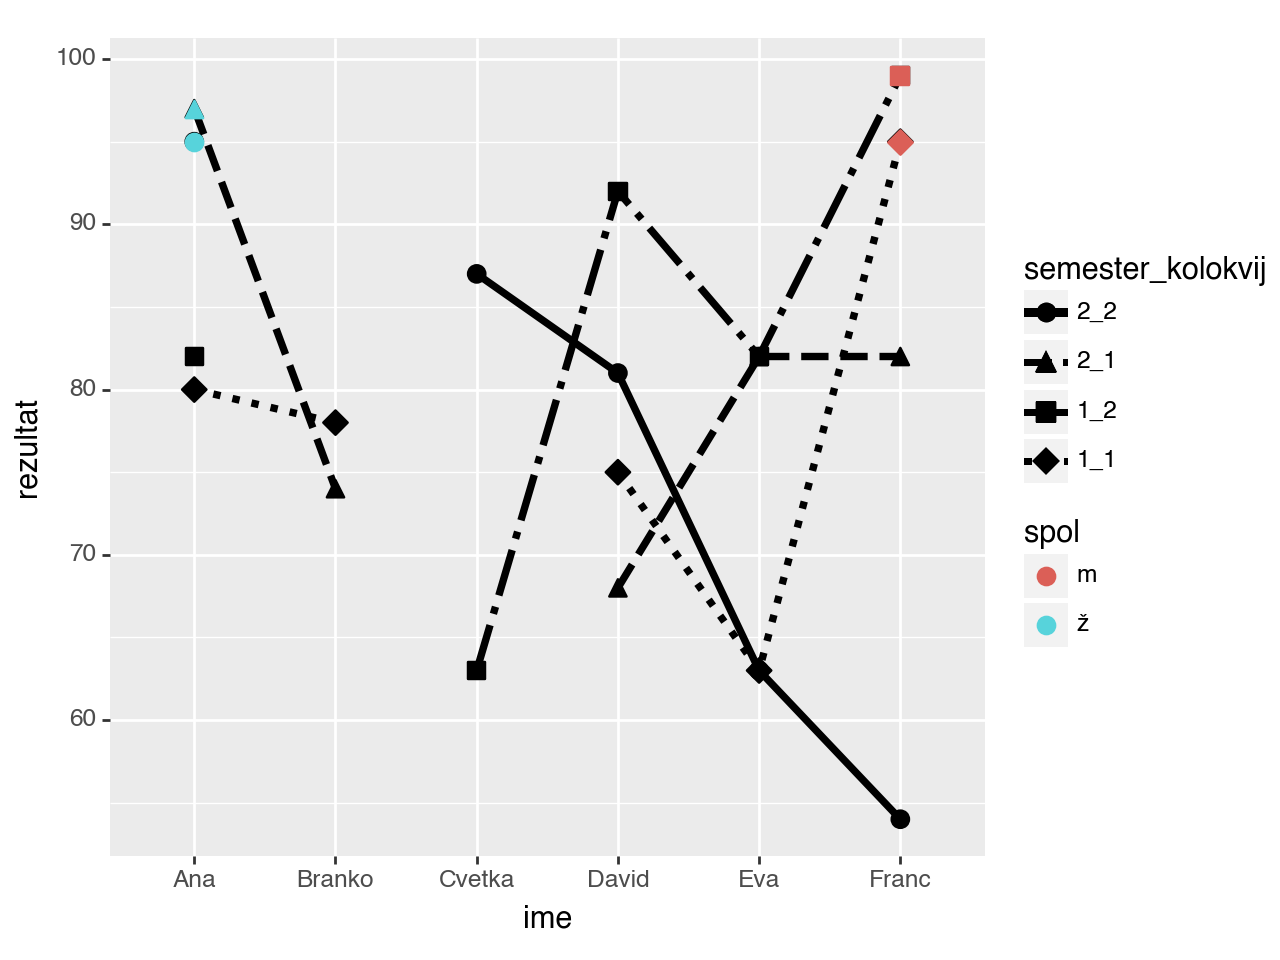

<Figure Size: (640 x 480)>

In [21]:
(
    p9.ggplot(studenti_ocene) +
    p9.aes(
        x = "ime",
        y = "rezultat",
        group = "semester_kolokvij",
        linetype = "semester_kolokvij",
        shape = "semester_kolokvij"
    ) +
    p9.geom_line(size = 1.5) +
    p9.geom_point(size = 3) +
    p9.geom_point(
        data = naj_ocene,
        mapping = p9.aes(
          x = "ime",
          y = "naj_rezultat",
          color = "spol"
        ),
        size = 3
    )
)

Diagram nam pokaže, da je oba kolokvija v drugem semestru najboljše opravila Ana (dva njena dosežka pobarvana modro), v drugem pa Franc (dva njegova dosežka pobarvana rdeče).

V vseh dosedanjih primerih so bile izbire uporabljenih barv samodejne. Knjižnica `plotnine` namreč samodejno določa privzete množice možnih vrednosti estetskih lastnosti, ki jih diagram uporablja. Zato, da spremenimo privzete množice, moramo spoznati peti element slovnice statističnih izrazov, lestvice.

## Lestvice, legende, koordinatne osi in koordinatni sistemi

Peti element slovnice statističnih diagramov je **lestvica** (angl. *scale*), ki definira preslikavo med spremenljivko in estetsko lastnostjo tako, da vsaki možni vrednosti spremenljivke dodeli vrednost estetske lastnosti. Vsaka estetska lastnost v neki plasti diagrama ima svojo lestvico. Lokalne estetske lastnosti imajo posebno lestvico za tisto plast, kjer so uporabljene, globalne pa imajo eno lestvico, ki velja čez vse plasti.

Bolj formalno, lestvico tvori trojica $(f, g, \theta)$:

- $f: D_X \to D_e$ je funkcija, ki preslika vrednosti spremenljivke $X$ v vrednosti estetske lastnosti $e$;

- $g: D_e \to D_X$ je funkcija, inverzna funkciji $f$, ki prelika vrednost estetske lastnosti $e$ v vrednost funkcije $X$;

- $\boldsymbol{\theta}$ so vrednosti parametrov, ki določajo funkciji $f$ in $g$.

Na primer, barvna lestvica za numerično spremenljivko preslika interval realnih števil (ki vsebuje vrednosti spremenljivke $X$) v _pot_ skozi izbrani barvni prostor. Parametri preslikave so (1) oblika poti, (2) barvni prostor ([RGB](https://en.wikipedia.org/wiki/RGB_color_spaces) ali [LUV](https://en.wikipedia.org/wiki/CIELUV)) ter (3) začetna in končna barva na poti, ki ustrezata spodnji in zgornji meji intervala realnih števil.

Lestvična inverzna funkcija $g$ omogoča risanje *vodiča*, ki grafično ponazori (pojasni) lestvico. Vodič je lahko:

- **koordinatna os** za lestvice, ki ustrezajo lastnostim pozicije (lege), `x` in `y`;

- **legenda** za lestvice, ki ustrezajo drugim estetskim lastnostim.

Funkcije knjižnice `plotnine` nastavijo lestvice, koordinatne osi in legende samodejno na osnovi podanih podatkovnih tabel. Nastavitve lahko spreminjamo s funkcijami opisanimi v nadaljevanju.

### Funkcije za koordinatne osi in koordinatni sistem

Meji koordinatne osi lahko nastavljamo s funkcijami [`xlim`](https://plotnine.readthedocs.io/en/stable/generated/plotnine.scales.xlim.html) in [`ylim`](https://plotnine.readthedocs.io/en/stable/generated/plotnine.scales.ylim.html). Vsaka prejme dva argumenta, spodnjo in zgornjo mejo osi. Če za argument podamo neznano vrednost `NA`, zahtevamo, da R samodejno nastavi mejo. Funkcija `expand_limits` omogoča nastavitev mej za obe osi in sprejme dva argumenta, `x` in `y`. Za vsak argument lahko podamo skalarno vrednost, ki nastavi spodnjo mejo ustrezne osi, ali vektor dveh elementov, ki nastavita vrednost spodnje in zgornje meje.

Nadaljnji dve funkciji, ki nam omogočata oblikovanje x- in y-osi diagramov sta [`scale_x_continuous`](https://plotnine.readthedocs.io/en/stable/generated/plotnine.scales.scale_x_continuous.html) in [`scale_y_continuous`](https://plotnine.readthedocs.io/en/stable/generated/plotnine.scales.scale_y_continuous.html). Končnica `_continuous` nakazuje, da se funkciji nanašata na koordinatne osi, ki nastanejo na osnovi numeričnih spremenljivk. Za osi, ki ustrezajo kvalitativne spremenljivke, lahko uporabimo funkciji [`scale_x_discrete`](https://plotnine.readthedocs.io/en/stable/generated/plotnine.scales.scale_x_discrete.html) in [`scale_y_discrete`](https://plotnine.readthedocs.io/en/stable/generated/plotnine.scales.scale_y_discrete.html).

Poglejmo najprej nekaj koristnih argumentov funkcij `scale_?_contunuous`, kjer je `?` oznaka za os, torej `x` ali `y`.

- `name` določa naslov osi, ki se pojavi pod oziroma desno od osi.

- `breaks` določa pozicije *glavnih oznak* (angl. *major ticks*) na osi. Vrednost `NULL` ukine vse oznake na osi. Vrednost `waiver()` določi privzete (samodejne) oznake, ki bi jih dobili, če oznak ne bi ročno nastavljali. Če želimo pozicije oznak ročno nastaviti, njihove pozicije podamo kot numerični vektor, kjer vsak element določa pozicijo ene oznake.

- `minor_breaks` določa pozicije *pomožnih oznak* (angl. minor ticks\_) na isti način kot parameter `breaks`.

- `n.breaks` ima celoštevilčno numerično vrednosti, ki določa število glavnih oznak na osi. Uporabljamo jo le takrat, ko je vrednost `breaks = waiver()`.

- `limits` je numeričen vektor dolžine dve, ki določata spodnjo in zgornjo mejo osi. Če ima element vektorja neznano vrednost `NaN`, zahtevamo, da R samodejno nastavi ustrezno mejo.

- `na.value` določa vrednost, ki pri pripravi diagrama, zamenja neznane vrednosti spremenljivke.

- `trans` določa transformacijo vrednosti na osi. Pogosto uporabljene transformacije so `log10`, `log2` (logaritmični transformaciji z osnovo 10 oziroma 2), `reverse` (obratni vrstni red vrednosti, od največje do najmanjše) ali `sqrt` (transformacija s kvadratnim korenom osnovnih vrednosti).

Nato pa še nekaj koristnih argumentov funkcij `scale_?_discrete`.

- `name`, `breaks` in `labels` in enako kot zgoraj za funkciji s končnico `_continuous`.

- `limits` uporabimo za določanje vrstnega reda vrednosti diskretne spremenljivke na osi.

- `na.translate` je logična vrednost, ki določi kako prikažemo neznane vrednosti. Privzeta vrednost `TRUE` določa, da se neznana vrednost `NA` pojavi kot ena od možnih vrednosti kvalitativne (diskretne) spremenljivke. Vrednost `FALSE` določi, da se neznane vrednosti odstranijo tako kot pri numeričnih spremenljivkah.

- `na.value` je vrednost s katero zamenjamo neznane vrednosti in je upoštevana takrat, ko je `na.translate = TRUE`.

Funkciji [`xlab`](https://plotnine.readthedocs.io/en/stable/generated/plotnine.labels.xlab.html) in [`ylab`](https://plotnine.readthedocs.io/en/stable/generated/plotnine.labels.ylab.html) omogočata hitro nastavitev naslovov osi `x` in `y`. Vsaka sprejme en argument, ki določi naslov ustrezne osi. Na tem mestu bomo omenili še funkcijo [`labs`](https://plotnine.readthedocs.io/en/stable/generated/plotnine.labels.labs.html), ki omogoča nastavitev ostalih naslovov grafa in načeloma ne sodi v to poglavje o oseh in koordinatnih sistemih, a vseeno sodi zraven funkcij `xlab` in `ylab`. Pogosto uporabljeni argumenti funkcije `labs` so:

- `title`, ki določi naslov celotnega diagrama,

- `subtitle`, ki določi podnaslov, kjer običajno pojasni glavne izsledke prikazanega grafikona,

- `caption`, ki ponuja dodatne informacije o diagramu, običajno podatkovne vire.

Poglejmo uporabo vseh zgoraj opisanih funkcij na primeru:

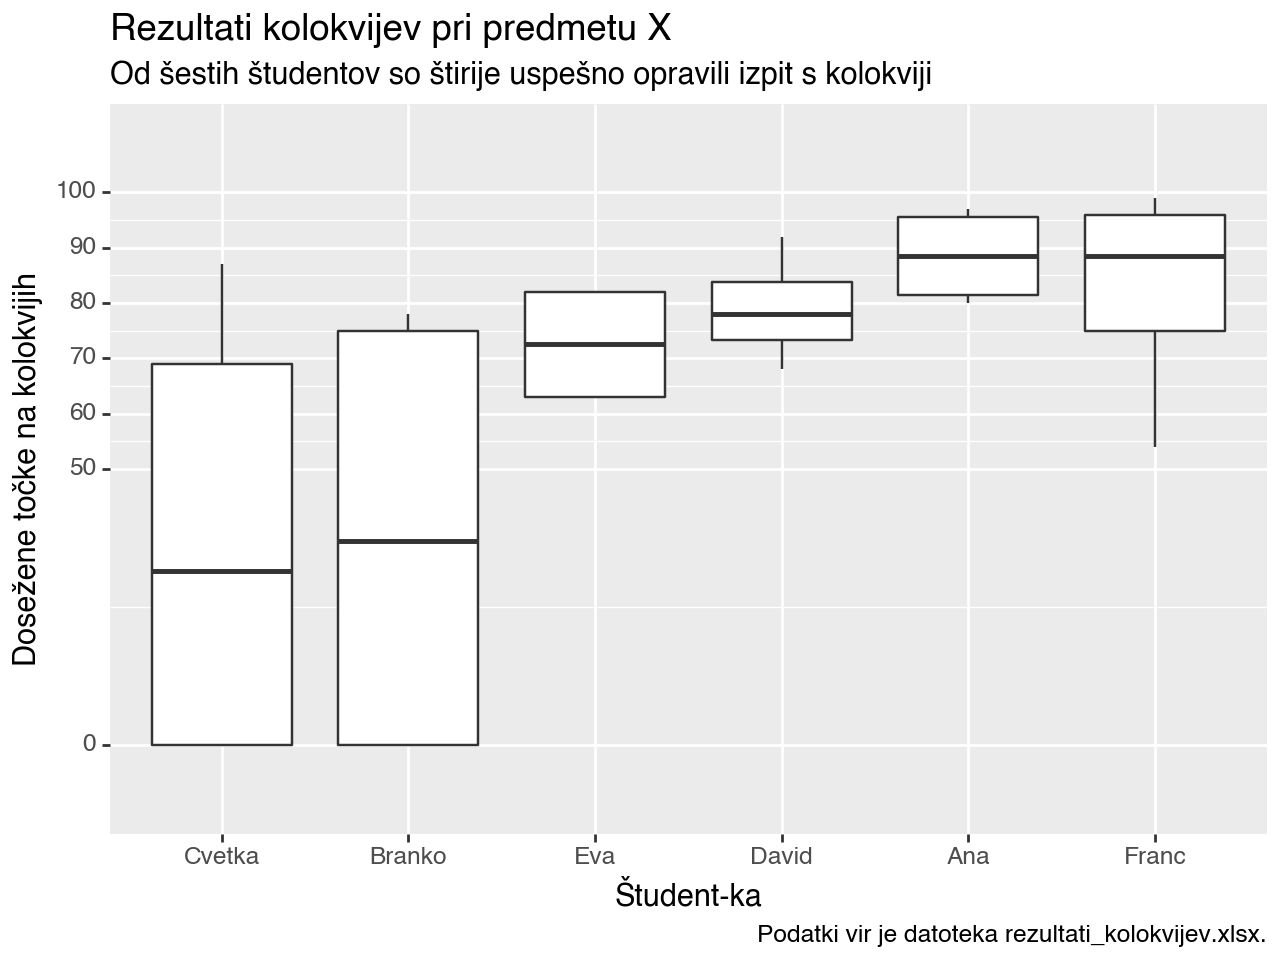

<Figure Size: (640 x 480)>

In [22]:
(
    p9.ggplot(data = studenti_ocene) + 
    p9.aes(
        x = "ime",
        y = "rezultat"
    ) +
    p9.geom_boxplot() +
    p9.scale_x_discrete(
        name = "Študent-ka",
        limits = ["Cvetka", "Branko", "Eva", "David", "Ana", "Franc"]
    ) +
    p9.scale_y_continuous(
        name = "Dosežene točke na kolokvijih",
        limits = [-10, 110],
        breaks = [0, 50, 60, 70, 80, 90, 100],
        na_value = 0
    ) +
    p9.labs(
        title = "Rezultati kolokvijev pri predmetu X",
        subtitle = "Od šestih študentov so štirije uspešno opravili izpit s kolokviji",
        caption = "Podatki vir je datoteka rezultati_kolokvijev.xlsx."
    )
)

### Funkcije za legende

Funkcije za nastavljanje legend s predpono `scale_` so podobne funkcijam za nastavljanje osi. Tudi njihovi argumenti so enaki. Poglejmo primer:


/Users/ljupco/predmeti/pandas/venv/lib/python3.11/site-packages/plotnine/layer.py:344: PlotnineWarning: position_stack : Removed 4 rows containing missing values.


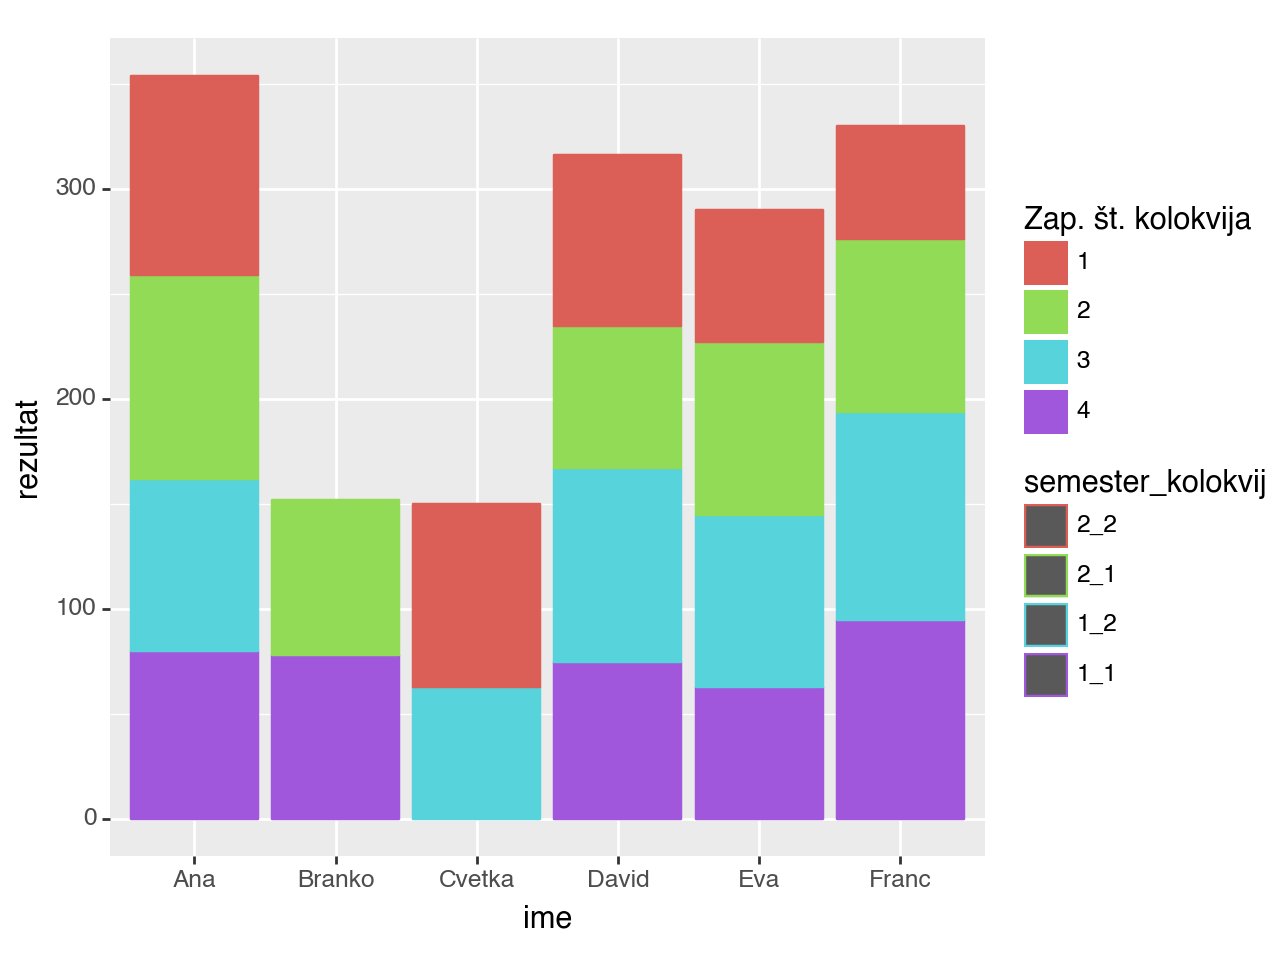

<Figure Size: (640 x 480)>

In [23]:
(
    p9.ggplot(studenti_ocene) +
    p9.aes(
        x = "ime",
        y = "rezultat",
        color = "semester_kolokvij",
        fill = "semester_kolokvij"
    ) +
    p9.geom_col() +
    p9.scale_fill_discrete(
        name = "Zap. št. kolokvija",
        labels = [str(i + 1) for i in range(4)]
    )
)

Vidimo, da nastavitev legende za estetsko lastnost `fill` ne vpliva na legendo za estetsko lastnost `color`. Slednjo lahko ukinemo, saj nam ne pove nič novega o barvah, ki so enake kot barve za `fill`. Kontrolo nad prikazovanjem legend nam omogoča funkcija [`guides`](https://plotnine.readthedocs.io/en/stable/generated/plotnine.guides.guides.html). Klic te funkcije z nastavitvijo vrednosti ustreznega argumenta na `None` prepreči prikazovanje legende:

/Users/ljupco/predmeti/pandas/venv/lib/python3.11/site-packages/plotnine/layer.py:344: PlotnineWarning: position_stack : Removed 4 rows containing missing values.


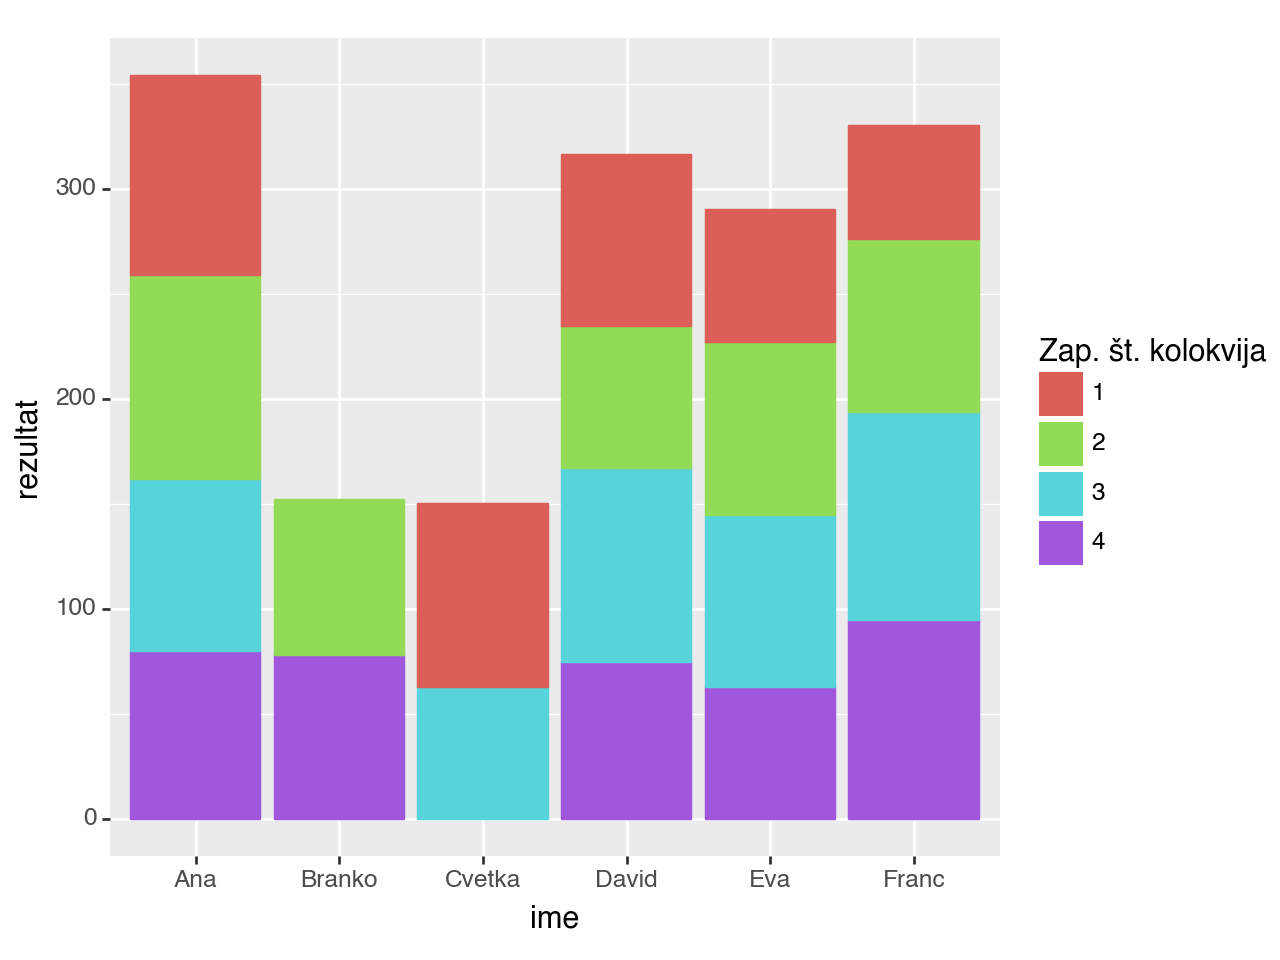

<Figure Size: (640 x 480)>

In [24]:
(
    p9.ggplot(studenti_ocene) +
    p9.aes(
        x = "ime",
        y = "rezultat",
        color = "semester_kolokvij",
        fill = "semester_kolokvij"
    ) +
    p9.geom_col() +
    p9.scale_fill_discrete(
        name = "Zap. št. kolokvija",
        labels = [str(i + 1) for i in range(4)]
    ) +
    p9.guides(color = None)
)

Poglejmo še enkrat primer nastavljanja besedila v legendah za barve, oblike točk in tipe črt. Legendo za barvno lestvico pri nastavljanju barv in njihovih besedilnih oznak uporabimo klic funkcije [`scale_color_discrete`](https://plotnine.readthedocs.io/en/stable/generated/plotnine.scales.scale_color_hue.html) in kombinacijo vrednosti argumentov `name`, `limits`, `labels` in `type`. Drugo legendo za dve estetski lastnosti oblik točk in tipov črt nastavimo s pomočjo dveh klicev [`scale_shape_manual`](https://plotnine.readthedocs.io/en/stable/generated/plotnine.scales.scale_shape_manual.html), ki si delita isti vrednosti argumentov `name` in `labels`:

/Users/ljupco/predmeti/pandas/venv/lib/python3.11/site-packages/plotnine/scales/scale.py:143: PlotnineWarning: scale_color_hue could not recognise parameter `type`
/Users/ljupco/predmeti/pandas/venv/lib/python3.11/site-packages/plotnine/layer.py:364: PlotnineWarning: geom_point : Removed 4 rows containing missing values.


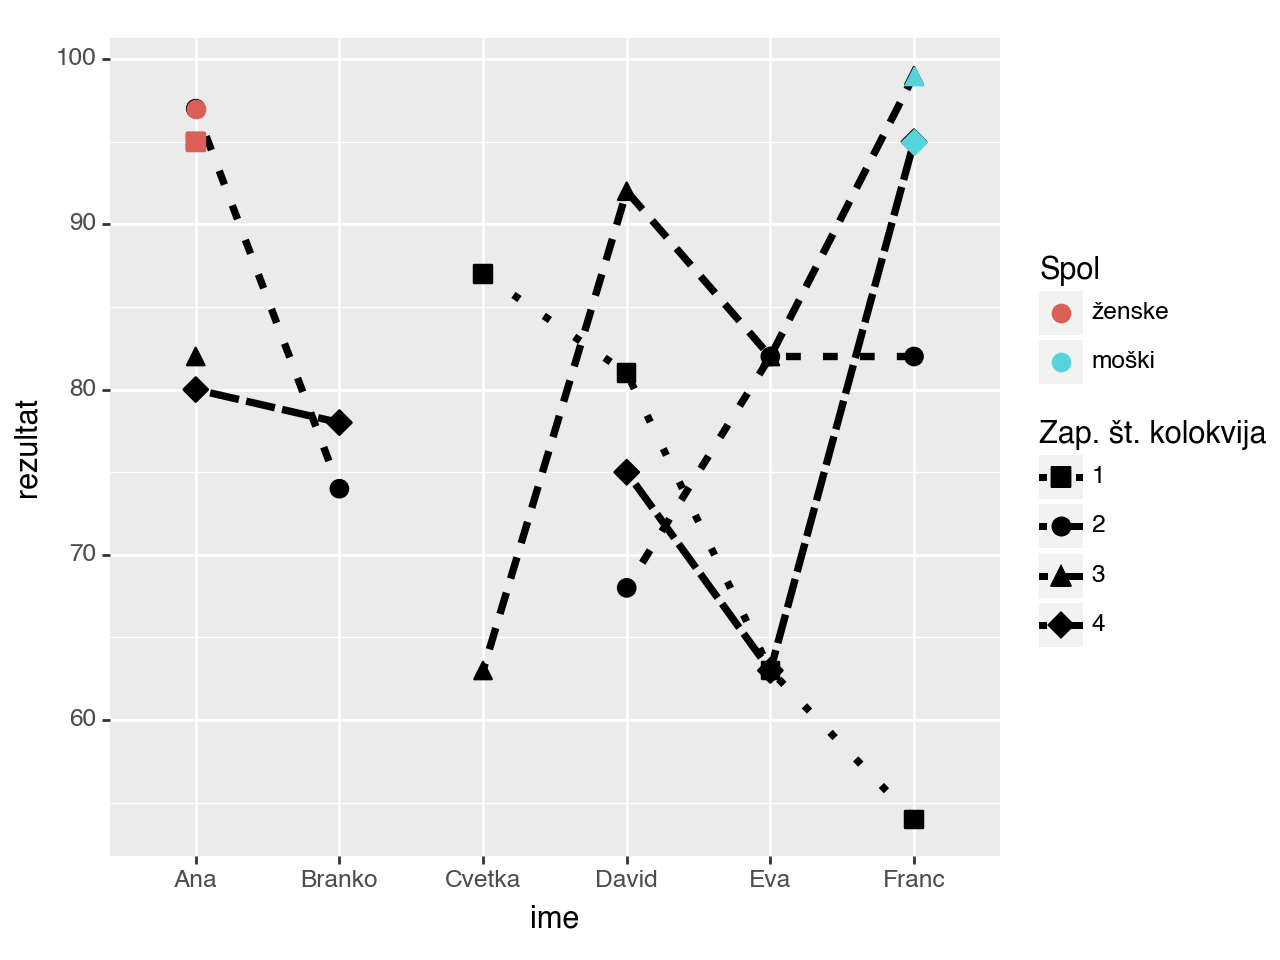

<Figure Size: (640 x 480)>

In [25]:
(
    p9.ggplot(studenti_ocene) +
    p9.aes(
        x = "ime",
        y = "rezultat",
        group = "semester_kolokvij",
        linetype = "semester_kolokvij",
        shape = "semester_kolokvij",
    ) +
    p9.geom_line(size = 1.5) +
    p9.geom_point(size = 3) +
    p9.geom_point(
        data = naj_ocene,
        mapping = p9.aes(
          x = "ime",
          y = "naj_rezultat",
          color = "spol"
        ),
        size = 3
    ) +
    p9.scale_color_discrete(
        name = "Spol",
        limits = ["ž", "m"],
        labels = ["ženske", "moški"],
        type = ["red", "blue"]
    ) +
    p9.scale_shape_manual(
        name = "Zap. št. kolokvija",
        values = ["s", "o", "^", "D"],
        labels = ["1", "2", "3", "4"]
    ) +
    p9.scale_linetype_manual(
      name = "Zap. št. kolokvija",
      values = [(0, (1, 4)), (1, (2, 3)), (2, (3, 2)), (3, (4, 1))],
      labels = ["1", "2", "3", "4"]
    )
)

Pozor, vrednost argumenta `values` funkcije `scale_shape_manual` je seznam oblik točk. Oznake za možne oblike točk definira knjižnica `matplotlib` in jih imenuje [označevalce](https://matplotlib.org/stable/api/markers_api.html) (angl. _markers_).

S klicem funkcije [`theme`](https://plotnine.readthedocs.io/en/stable/generated/plotnine.themes.theme.html) in nastavitvijo argumenta `legend.position` omogoča spreminjanje pozicije legend na `"bottom"`, `"top"` ali pa na poljubno pozicijo na diagramu `[x, y]` določeno s koordinatami `x` in `y`:

/Users/ljupco/predmeti/pandas/venv/lib/python3.11/site-packages/plotnine/layer.py:344: PlotnineWarning: position_stack : Removed 4 rows containing missing values.


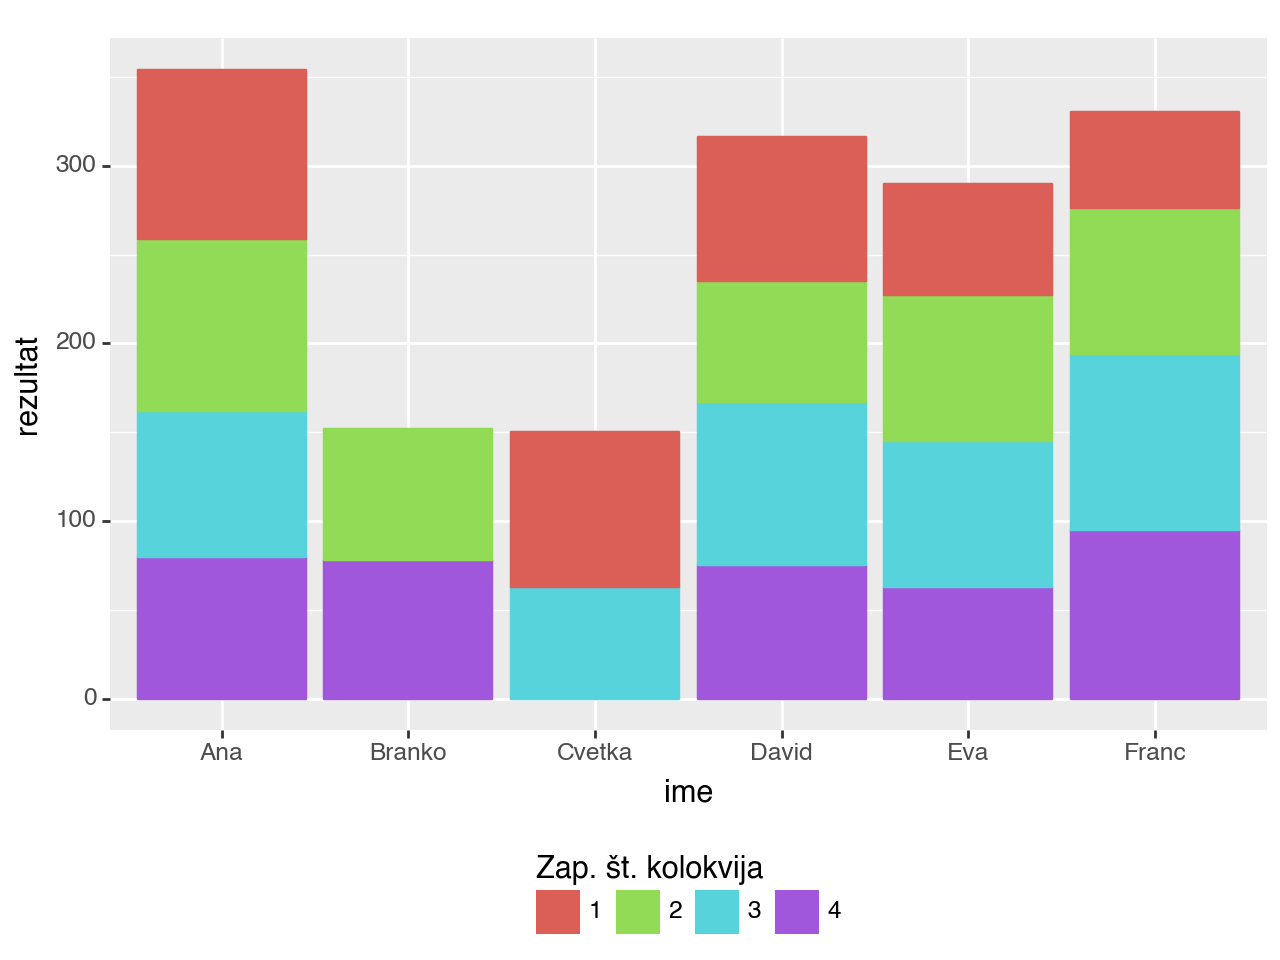

<Figure Size: (640 x 480)>

In [26]:
(
    p9.ggplot(studenti_ocene) +
    p9.aes(
        x = "ime",
        y = "rezultat",
        color = "semester_kolokvij",
        fill = "semester_kolokvij"
    ) +
    p9.geom_col() +
    p9.scale_fill_discrete(
        name = "Zap. št. kolokvija",
        labels = [str(i + 1) for i in range(4)]
    ) +
    p9.guides(color = None) +
    p9.theme(legend_position = "bottom")
)


Sicer je `theme` funkcija, ki določa način prikazovanja elementov diagrama, ki se ne nanašajo na podatke, kot so že omenjene legende, a tudi naslovi, oznake, pisave, ozadje in vodilne črte v ozadju. Namesto napornega nastavljanja vsakega argumenta posebej, lahko uporabljamo funkcije s predpono `theme`, ki nam omogočajo enostavno nastavitev več teh parametrov hkrati z nastavitvami, ki so drugačne od običajnih. Na primer, [`theme_classic`](https://plotnine.readthedocs.io/en/stable/generated/plotnine.themes.theme_classic.html):

/Users/ljupco/predmeti/pandas/venv/lib/python3.11/site-packages/plotnine/layer.py:344: PlotnineWarning: position_stack : Removed 4 rows containing missing values.


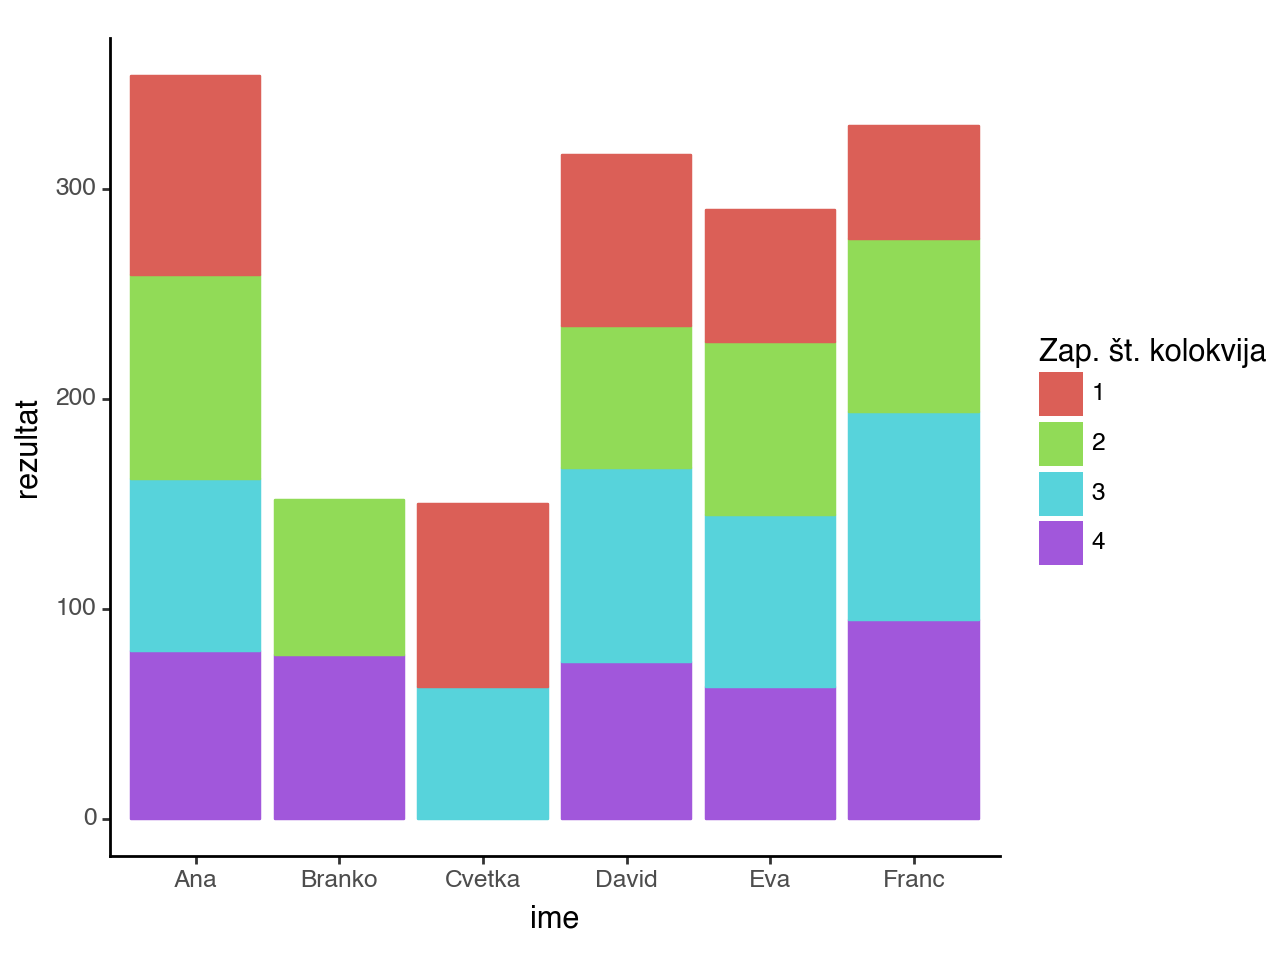

<Figure Size: (640 x 480)>

In [27]:
(
    p9.ggplot(studenti_ocene) +
    p9.aes(
        x = "ime",
        y = "rezultat",
        color = "semester_kolokvij",
        fill = "semester_kolokvij"
    ) +
    p9.geom_col() +
    p9.scale_fill_discrete(
        name = "Zap. št. kolokvija",
        labels = [str(i + 1) for i in range(4)]
    ) +
    p9.guides(color = None) +
    p9.theme(legend_position = "bottom") +
    p9.theme_classic()
)

Za vajo poskusi še druge načine prikazovanja, [`theme_bw`](https://plotnine.readthedocs.io/en/stable/generated/plotnine.themes.theme_bw.html), [`theme_minimal`](https://plotnine.readthedocs.io/en/stable/generated/plotnine.themes.theme_minimal.html), [`theme_light`](https://plotnine.readthedocs.io/en/stable/generated/plotnine.themes.theme_light.html), [`theme_dark`](https://plotnine.readthedocs.io/en/stable/generated/plotnine.themes.theme_dark.html) ali [`theme_void`](https://plotnine.readthedocs.io/en/stable/generated/plotnine.themes.theme_void.html).

## Koordinatni sistem

Spoznajmo na tem mestu še eno sestavino slovnice statističnih diagramov, koordinatni sistem. Knjižnica `plotnine` vsem diagramom samodejno določi _kartezični_ koordinatni sistem. Velikosti enot na vsaki osi sta tudi samodejno določeni, kar lahko povzroči popačenje dobljenega diagrama v primerih, ko je pomembno, da sta enoti enaki (poglejmo diagram, ki ga `plotnine` nariše iz podatkov za enotsko krožnico):

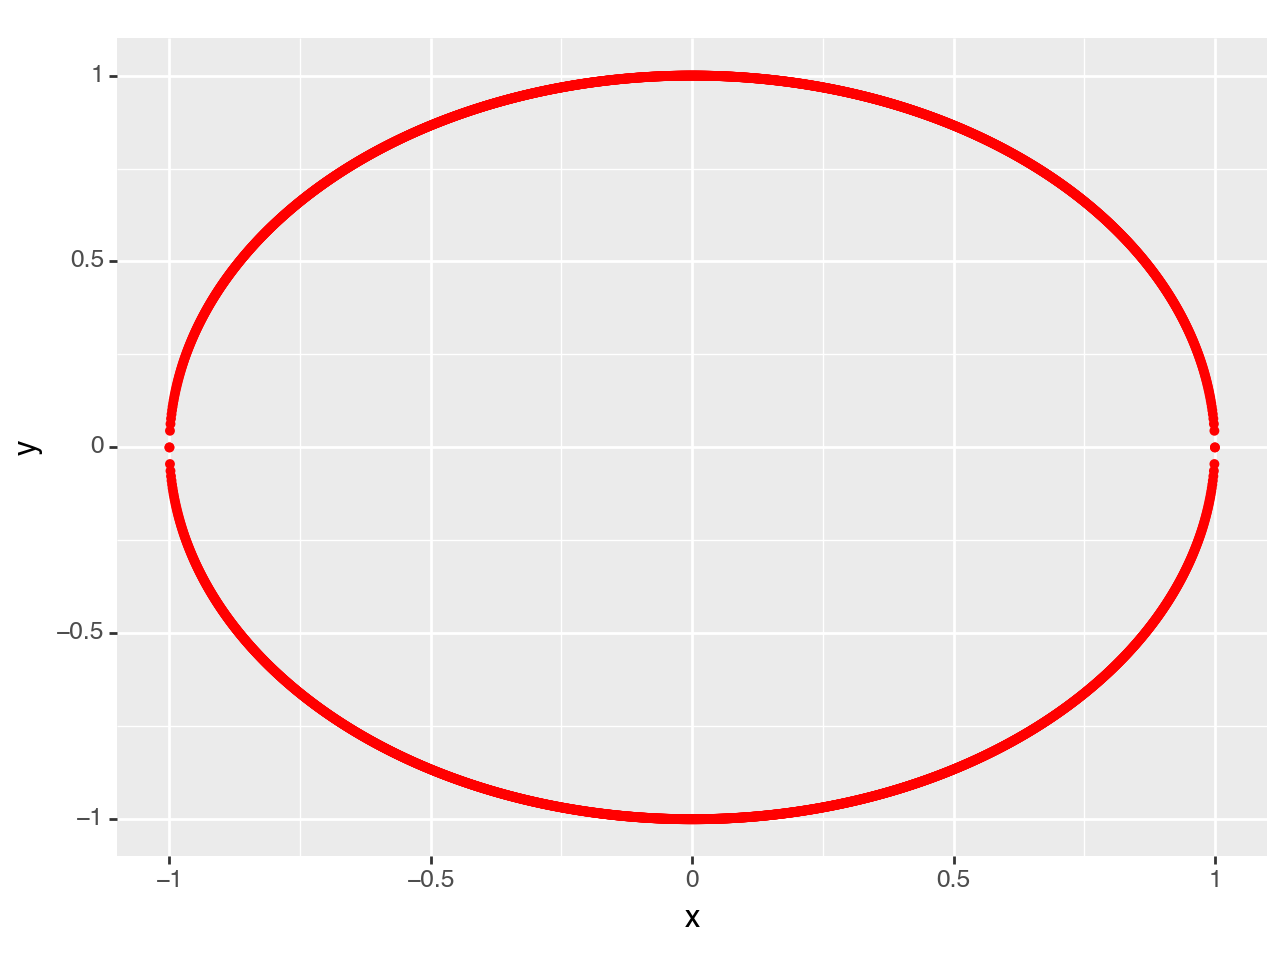

<Figure Size: (640 x 480)>

In [28]:
from math import sqrt

n = 2000
xs = [i / (n // 2) - 1 for i in range(n + 1)]
ys_p = [sqrt(1 - x ** 2) for x in xs]
ys_n = [-sqrt(1 - x ** 2) for x in xs]

kroznica = pd.DataFrame({
    "x": xs + xs,
    "y": ys_n + ys_p
})

(
    p9.ggplot(kroznica) +
    p9.aes(x = "x", y = "y") +
    p9.geom_point(color = "red", size = 1)
)

Diagram namesto pričakovane krožnice prikazuje elipso. Enaki enoti na obeh oseh lahko dosežemo z uporabo koordinatnega sistema [`coord_equal`](https://plotnine.readthedocs.io/en/stable/generated/plotnine.coords.coord_fixed.html):

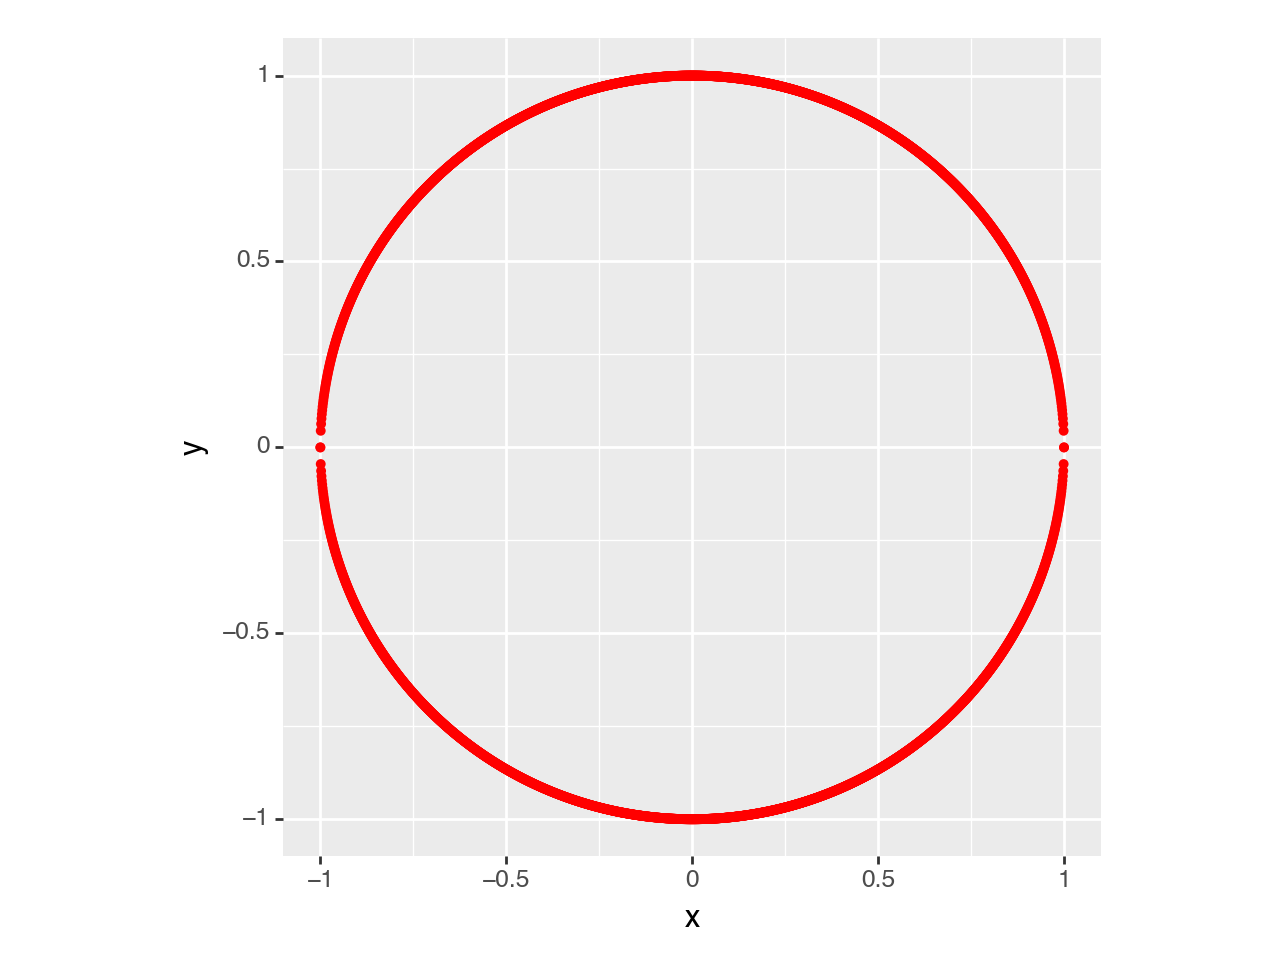

<Figure Size: (640 x 480)>

In [29]:
(
    p9.ggplot(kroznica) +
    p9.aes(x = "x", y = "y") +
    p9.geom_point(color = "red", size = 1) +
    p9.coord_equal()
)

V statističnih diagramih lahko uporabljamo tudi _polarni_ koordinatni sistem. Če v polarnem koordinatnem sistemu narišemo stolpčni diagram nastane tortni diagram, ki ga poznamo iz programov za delo s preglednicami:

In [31]:
ocene_ana = studenti_ocene.loc[studenti_ocene.ime == "Ana", :]

(
    p9.ggplot(ocene_ana) +
    p9.aes(
        x = None,
        y = "rezultat",
        color = "semester_kolokvij",
        fill = "semester_kolokvij"
    ) +
    p9.geom_col() +
    p9.ylim(0, 400) +
    p9.coord_polar(theta = "y", start = 0)
)

AttributeError: module 'plotnine' has no attribute 'coord_polar'

V tem trenutku `plotnine` ne omogoča uporabe polarnega koordinatnega sistema.

## Prilagajanje pozicije, angl. *position adjustment*

V statističnih diagramih pogosto, zaradi prevelike gostote prikazanih geometrijskih objektov in njihove premajhne medsebojne razdalje, se objekti začnejo prekrivati in skrivati en drugega. V takih primerih moramo izbrati metodo, ki **prerazporedi pozicije objektov** tako, da prekrivanje omili ali se mu popolnoma izogne. Tej metodi rečemo *prilagajanje pozicije* in predstavlja nadaljnji element slovnice statističnih diagramov.

Tako, na primer, v stolpčnih diagramih lahko postavimo stolpce, ki ustrezajo različnim spremenljivkam en zraven drugega (`dodge`) ali pa jih naložimo en na drugega (`stack` oziroma `fill`). Za omilitev prekrivanja točk pa lahko uporabimo `jitter`, t.j., naključno prilagajanje pozicije.

Primer geometrijskih objektov, kjer skoraj vedno pride do prekrivanja je `geom_col`, ki smo ga uporabili v zadnjem primeru prejšnjega razdelka. Pravzaprav imajo vsi geometrijski objekti (pravokotniki), ki ustrezajo Ani isto vrednost estetske lastnosti `x` in različne vrednosti `y`. Zato bi se morali vsi štirje pravokotniki za Ano prekrivati, tako da so vsa njihova oglišča levo spodaj biti na poziciji `(0, 0)`. A kot vidimo na diagramu, se to ne zgodi, ker `geom_col` samodejno spremeni pozicije pravokotnikov v `stack`. To nastavitev lahko spremenimo z nastavitvijo argumenta `position`, katere vrednost dobimo s klicem ustrezne funkcije s predpono `position_`:

/Users/ljupco/predmeti/pandas/venv/lib/python3.11/site-packages/plotnine/layer.py:364: PlotnineWarning: geom_col : Removed 4 rows containing missing values.


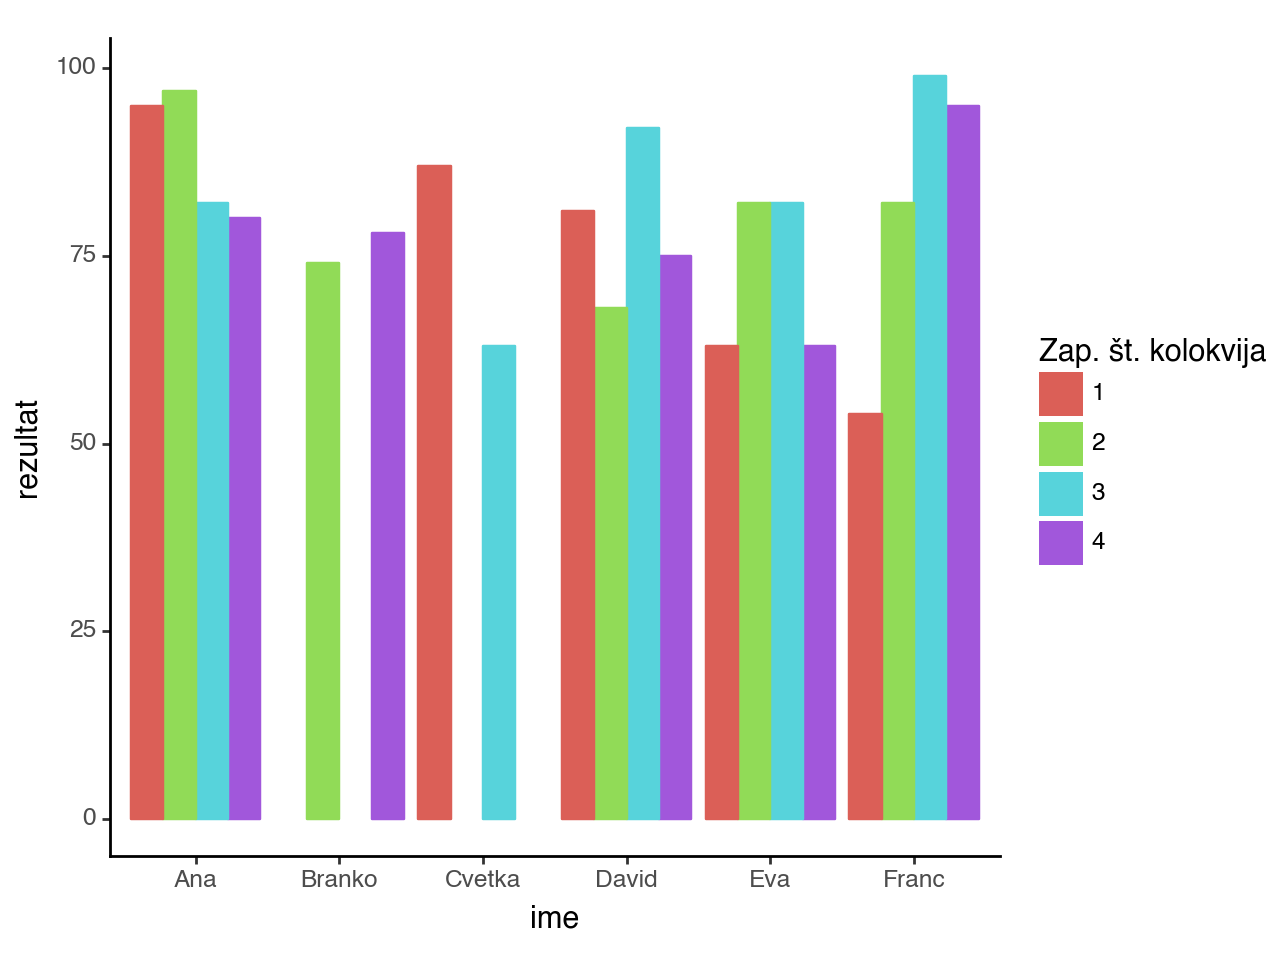

<Figure Size: (640 x 480)>

In [32]:
(
    p9.ggplot(studenti_ocene) +
    p9.aes(
        x = "ime",
        y = "rezultat",
        color = "semester_kolokvij",
        fill = "semester_kolokvij"
    ) +
    p9.geom_col(position = p9.position_dodge()) +
    p9.scale_fill_discrete(
        name = "Zap. št. kolokvija",
        labels = [str(i + 1) for i in range(4)]
    ) +
    p9.guides(color = None) +
    p9.theme(legend_position = "bottom") +
    p9.theme_classic()
)

Za vajo poskusi klice funkcij [`position_fill`](https://plotnine.readthedocs.io/en/stable/generated/plotnine.positions.position_fill.html) in [`position_jitter`](https://plotnine.readthedocs.io/en/stable/generated/plotnine.positions.position_jitter.html) in ugotovi, katere nastavitve so smiselne za stolpčne diagrame.

## Več vidikov, angl. *faceting*

## Naloge

V pripravi.